# Import des valeurs et structuration des données

In [210]:
import pandas as pd
data={'c1':{'r1':'','r3':'','r5':''},'c2':{'r2':'','r4':'','r6':''},'c3':{'r7':'','r8':'','r9':''}}

In [211]:
for c in data:
    for r in data[c]:
        data[c][r]=pd.read_csv(c+r+'.tsv', sep='\t')

C:\Users\asus\Dev\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (65,66,67,68,69,70,72,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\asus\Dev\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (65,66,67,68,69,70,71,72,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\asus\Dev\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (37,38,65,66,67,68,69,70,72,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [212]:
data['c1']['r1']

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
0,0,1233368193647,NaN,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19185,1233368212832,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35839,1233368229486,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,65974,1233368259621,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82628,1233368276275,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18310,277862955,1233646056602,Mouse,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1373.0,692.0
18311,277877683,1233646071330,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18312,277893236,1233646086883,Mouse,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1288.0,767.0
18313,277894168,1233646087815,Mouse,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1287.0,769.0


In [ ]:
On découpe les données

In [241]:
events={c: {r:data[c][r]['Event'].dropna().to_dict()for r in data[c]} for c in data}
time_stamps={c:{r:([i for i in events[c][r] if events[c][r][i]=="ImageStimulusStart" or events[c][r][i]=="VideoStimulusStart"]+[len(data[c][r])]) for r in events[c]} for c in events} 

In [246]:
df={'c1':{'r1':'','r3':'','r5':''},'c2':{'r2':'','r4':'','r6':''},'c3':{'r7':'','r8':'','r9':''}}
for c in df:
    for r in df[c]:
        for i in range(10):
            t1=time_stamps[c][r][i]
            t2=time_stamps[c][r][i+1]
            temp_df=data[c][r][t1:t2]
            df[c][r]={'q'+str(i+1): data[c][r][time_stamps[c][r][i]:time_stamps[c][r][i+1]] for i in range(10)}

In [248]:
df['c1']['r1']['q1']

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
5644,92230674,1233460424321,NaN,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5645,92246179,1233460439826,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5646,92262834,1233460456481,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5647,92279488,1233460473135,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5648,92296143,1233460489790,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6877,107080442,1233475274089,NaN,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6878,107080442,1233475274089,Mouse,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1663.0,396.0
6879,107085552,1233475279199,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6880,107102207,1233475295854,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [250]:
img = {i: {j: mpimg.imread('c'+str(i)+'q'+str(j)+'.png') for j in range(1,11)}for i in range(1,4)}

In [251]:

import numpy as np

In [100]:
c=1
q=1
recording=1
lines=[[(850,850),(100,100)][(220,780),(220,780)]]
def display(r,c,q,recording,img, lines):
    x=[r[recording]['Gaze point X'][i] for i in range(time_stamps[recording][q-1],time_stamps[recording][q])  if r[recording]['Gaze point Y'][i]<1080]
    y=[r[recording]['Gaze point Y'][i] for i in range(time_stamps[recording][q-1],time_stamps[recording][q]) if r[recording]['Gaze point Y'][i]<1080]
    """x2=[1920-r[recording]['Mouse position X'][i] for i in range(time_stamps[recording][q-1],time_stamps[recording][q])]
    y2=[1080-r[recording]['Mouse position Y'][i] for i in range(time_stamps[recording][q-1],time_stamps[recording][q])  ]"""
    plt.imshow(img[c][q])
    plt.scatter(x, y, color="blue", linewidth=3, s=1)
    """plt.scatter(x2, y2, color="red", linewidth=3, s=1)"""
    for i in range(len(lines[0])):
        plt.plot(lines[0][i],lines[1][i])
    plt.show()


display(r,c,q,recording,img)


TypeError: list indices must be integers or slices, not tuple

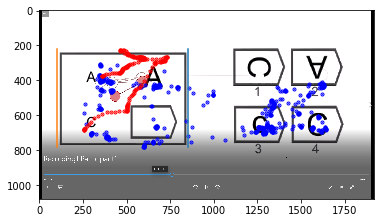

In [88]:
c=1
q=2
recording=1
display(r,c,q,recording,img)

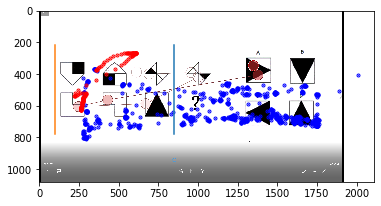

In [86]:
c=1
q=3
recording=1
display(r,c,q,recording,img)

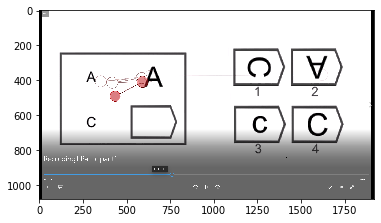

In [83]:
plt.imshow(img[1][3])

In [20]:
from PIL import Image
img = Image.open('q1.png')
img.resize(1980)
img.size

(1890, 1417)

In [23]:
events={k: df['Event'].dropna().to_dict()for k,df in r.items()}
time_stamps={k:[i for i in events[k] if events[k][i]=="ImageStimulusStart"] for k in events} 

NameError: name 'r' is not defined

In [59]:

x0=r[1]["Gaze point X"][time_stamps[1][0]:(time_stamps[1][0]+100)].dropna()
y0=r[1]["Gaze point Y"][time_stamps[1][0]:(time_stamps[1][0]+100)].dropna()

In [62]:
y0[[i for i in y0.index if y0[i]<1082]]

5655    537.0
5656    541.0
5657    522.0
5658    518.0
5659    533.0
        ...  
5736    650.0
5737    647.0
5738    656.0
5740    660.0
5742    649.0
Name: Gaze point Y, Length: 86, dtype: float64

In [64]:
x=int(x0[5655])
y=int(y0[5655])
print((x,y))

(852, 537)


Traitement d'image (trouver des zones d'une couleur)

In [72]:
pixval[x][y]

(140, 140, 140)

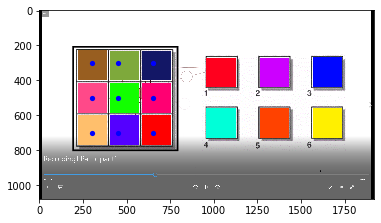

In [186]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_aoi=mpimg.imread('c1q1 - Copie.png')
plt.imshow(img_aoi)
plt.scatter(echantillons[0],echantillons[1], color="blue", linewidth=3, s=5)
plt.show()

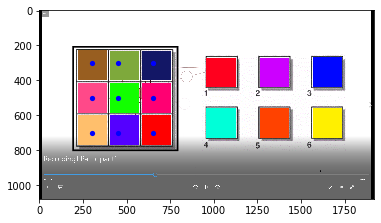

In [187]:
plt.imshow(img_aoi)
plt.scatter(echantillons[0],echantillons[1], color="blue", linewidth=3, s=5)
plt.show()

In [188]:
echantillons=[[300,450,650,300,450,650,300,450,650],[300,300,300,500,500,500,700,700,700]]
echantillons_couleurs=[img_aoi[i][j] for i,j in zip(echantillons[0],echantillons[1])]

In [189]:
echantillons_couleurs

[array([0.59607846, 0.36862746, 0.1254902 ], dtype=float32),
 array([1.        , 0.28627452, 0.5372549 ], dtype=float32),
 array([1.        , 0.7490196 , 0.42352942], dtype=float32),
 array([0.49411765, 0.6627451 , 0.23137255], dtype=float32),
 array([0.07058824, 1.        , 0.        ], dtype=float32),
 array([0.32941177, 0.        , 1.        ], dtype=float32),
 array([0.07450981, 0.09019608, 0.4       ], dtype=float32),
 array([1.        , 0.        , 0.44705883], dtype=float32),
 array([1., 0., 0.], dtype=float32)]

In [190]:
echantillons_couleurs[3]

array([0.49411765, 0.6627451 , 0.23137255], dtype=float32)

In [191]:
l=echantillons_couleurs[0]

[j for j in range(len(echantillons_couleurs)) if np.all([echantillons_couleurs[j][i]==l[i] for i in range(len(l))])]

[0]

In [192]:
np.all([echantillons_couleurs[3][l]==img_aoi[500][500][l] for l in range(len(l))])

False

In [193]:
aoi=[]
for i in range(len(img_aoi)):
    aoi.append([])
    for j in range(len(img_aoi[i])):
        aoi[i].append(0)
for i in range(len(img_aoi)):
    for j in range(len(img_aoi[i])):
        for k in range(len(echantillons_couleurs)):
            if np.all([echantillons_couleurs[k][l]==img_aoi[i][j][l] for l in range(len(l))]):
                      aoi[i][j]=k+1
                

In [194]:
aoi[450][450]

5

In [198]:
recording=1
x=r[recording]['Gaze point X'][time_stamps[recording][0]:time_stamps[recording][1]].dropna()
y=r[recording]['Gaze point Y'][time_stamps[recording][0]:time_stamps[recording][1]].dropna()

In [199]:
aoi_recording_1= [aoi[int(j)][int(i)] for i,j in zip(x,y) if ((0<j)and(j<1080) and (0<i) and (i<1920))]

In [201]:
aoi_r1_c1_q1=aoi_recording_1

In [204]:
unique, counts = np.unique(aoi_r1_c1_q1, return_counts=True)

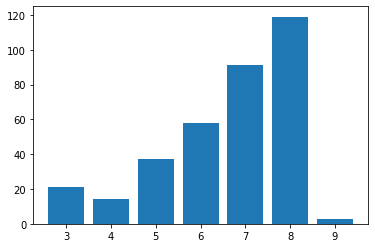

In [206]:
plt.bar(unique[1:],counts[1:])
plt.show()

In [98]:
for i in range(len(img)):
    for j in range(len(img[i])):
        if np.all([i==0 for i in img[i][j]]):
            print((i,j))
        
plt.imshow(mpimg.imread('c1q1 - Copie.png'))
plt.scatter([500], [500], color="blue", linewidth=3, s=5)
plt.show()    

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 12)
(0, 13)
(0, 14)
(0, 1905)
(0, 1906)
(0, 1907)
(0, 1909)
(0, 1910)
(0, 1911)
(0, 1912)
(0, 1913)
(0, 1914)
(0, 1915)
(0, 1916)
(0, 1917)
(0, 1918)
(0, 1919)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 12)
(1, 13)
(1, 14)
(1, 1905)
(1, 1906)
(1, 1907)
(1, 1909)
(1, 1910)
(1, 1911)
(1, 1912)
(1, 1913)
(1, 1914)
(1, 1915)
(1, 1916)
(1, 1917)
(1, 1918)
(1, 1919)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(2, 12)
(2, 13)
(2, 14)
(2, 1905)
(2, 1906)
(2, 1907)
(2, 1909)
(2, 1910)
(2, 1911)
(2, 1912)
(2, 1913)
(2, 1914)
(2, 1915)
(2, 1916)
(2, 1917)
(2, 1918)
(2, 1919)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(3, 12)
(3, 13)
(3, 14)
(3, 1905)
(3, 1906)
(3, 1907)
(3, 1909)
(3, 1910)
(3, 1911)
(3, 1912)
(3, 1913)
(3, 1914)
(3, 1915)
(3, 1916)
(3, 1917)
(3, 1918)
(3, 1919)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 

(36, 1905)
(36, 1906)
(36, 1907)
(36, 1909)
(36, 1910)
(36, 1911)
(36, 1912)
(36, 1913)
(36, 1914)
(36, 1915)
(36, 1916)
(36, 1917)
(36, 1918)
(36, 1919)
(37, 0)
(37, 1)
(37, 2)
(37, 3)
(37, 4)
(37, 5)
(37, 6)
(37, 7)
(37, 8)
(37, 9)
(37, 10)
(37, 12)
(37, 13)
(37, 14)
(37, 1905)
(37, 1906)
(37, 1907)
(37, 1909)
(37, 1910)
(37, 1911)
(37, 1912)
(37, 1913)
(37, 1914)
(37, 1915)
(37, 1916)
(37, 1917)
(37, 1918)
(37, 1919)
(38, 0)
(38, 1)
(38, 2)
(38, 3)
(38, 4)
(38, 5)
(38, 6)
(38, 7)
(38, 8)
(38, 9)
(38, 10)
(38, 12)
(38, 13)
(38, 14)
(38, 1905)
(38, 1906)
(38, 1907)
(38, 1909)
(38, 1910)
(38, 1911)
(38, 1912)
(38, 1913)
(38, 1914)
(38, 1915)
(38, 1916)
(38, 1917)
(38, 1918)
(38, 1919)
(39, 0)
(39, 1)
(39, 2)
(39, 3)
(39, 4)
(39, 5)
(39, 6)
(39, 7)
(39, 8)
(39, 9)
(39, 10)
(39, 12)
(39, 13)
(39, 14)
(39, 1905)
(39, 1906)
(39, 1907)
(39, 1909)
(39, 1910)
(39, 1911)
(39, 1912)
(39, 1913)
(39, 1914)
(39, 1915)
(39, 1916)
(39, 1917)
(39, 1918)
(39, 1919)
(40, 0)
(40, 1)
(40, 2)
(40, 3)
(40,

(70, 1905)
(70, 1906)
(70, 1907)
(70, 1909)
(70, 1910)
(70, 1911)
(70, 1912)
(70, 1913)
(70, 1914)
(70, 1915)
(70, 1916)
(70, 1917)
(70, 1918)
(70, 1919)
(71, 0)
(71, 1)
(71, 2)
(71, 3)
(71, 4)
(71, 5)
(71, 6)
(71, 7)
(71, 8)
(71, 9)
(71, 10)
(71, 12)
(71, 13)
(71, 14)
(71, 1905)
(71, 1906)
(71, 1907)
(71, 1909)
(71, 1910)
(71, 1911)
(71, 1912)
(71, 1913)
(71, 1914)
(71, 1915)
(71, 1916)
(71, 1917)
(71, 1918)
(71, 1919)
(72, 0)
(72, 1)
(72, 2)
(72, 3)
(72, 4)
(72, 5)
(72, 6)
(72, 7)
(72, 8)
(72, 9)
(72, 10)
(72, 12)
(72, 13)
(72, 14)
(72, 1905)
(72, 1906)
(72, 1907)
(72, 1909)
(72, 1910)
(72, 1911)
(72, 1912)
(72, 1913)
(72, 1914)
(72, 1915)
(72, 1916)
(72, 1917)
(72, 1918)
(72, 1919)
(73, 0)
(73, 1)
(73, 2)
(73, 3)
(73, 4)
(73, 5)
(73, 6)
(73, 7)
(73, 8)
(73, 9)
(73, 10)
(73, 12)
(73, 13)
(73, 14)
(73, 1905)
(73, 1906)
(73, 1907)
(73, 1909)
(73, 1910)
(73, 1911)
(73, 1912)
(73, 1913)
(73, 1914)
(73, 1915)
(73, 1916)
(73, 1917)
(73, 1918)
(73, 1919)
(74, 0)
(74, 1)
(74, 2)
(74, 3)
(74,

(102, 1905)
(102, 1906)
(102, 1907)
(102, 1909)
(102, 1910)
(102, 1911)
(102, 1912)
(102, 1913)
(102, 1914)
(102, 1915)
(102, 1916)
(102, 1917)
(102, 1918)
(102, 1919)
(103, 0)
(103, 1)
(103, 2)
(103, 3)
(103, 4)
(103, 5)
(103, 6)
(103, 7)
(103, 8)
(103, 9)
(103, 10)
(103, 12)
(103, 13)
(103, 14)
(103, 1905)
(103, 1906)
(103, 1907)
(103, 1909)
(103, 1910)
(103, 1911)
(103, 1912)
(103, 1913)
(103, 1914)
(103, 1915)
(103, 1916)
(103, 1917)
(103, 1918)
(103, 1919)
(104, 0)
(104, 1)
(104, 2)
(104, 3)
(104, 4)
(104, 5)
(104, 6)
(104, 7)
(104, 8)
(104, 9)
(104, 10)
(104, 12)
(104, 13)
(104, 14)
(104, 1905)
(104, 1906)
(104, 1907)
(104, 1909)
(104, 1910)
(104, 1911)
(104, 1912)
(104, 1913)
(104, 1914)
(104, 1915)
(104, 1916)
(104, 1917)
(104, 1918)
(104, 1919)
(105, 0)
(105, 1)
(105, 2)
(105, 3)
(105, 4)
(105, 5)
(105, 6)
(105, 7)
(105, 8)
(105, 9)
(105, 10)
(105, 12)
(105, 13)
(105, 14)
(105, 1905)
(105, 1906)
(105, 1907)
(105, 1909)
(105, 1910)
(105, 1911)
(105, 1912)
(105, 1913)
(105, 1914

(130, 1905)
(130, 1906)
(130, 1907)
(130, 1909)
(130, 1910)
(130, 1911)
(130, 1912)
(130, 1913)
(130, 1914)
(130, 1915)
(130, 1916)
(130, 1917)
(130, 1918)
(130, 1919)
(131, 0)
(131, 1)
(131, 2)
(131, 3)
(131, 4)
(131, 5)
(131, 6)
(131, 7)
(131, 8)
(131, 9)
(131, 10)
(131, 12)
(131, 13)
(131, 14)
(131, 1905)
(131, 1906)
(131, 1907)
(131, 1909)
(131, 1910)
(131, 1911)
(131, 1912)
(131, 1913)
(131, 1914)
(131, 1915)
(131, 1916)
(131, 1917)
(131, 1918)
(131, 1919)
(132, 0)
(132, 1)
(132, 2)
(132, 3)
(132, 4)
(132, 5)
(132, 6)
(132, 7)
(132, 8)
(132, 9)
(132, 10)
(132, 12)
(132, 13)
(132, 14)
(132, 1905)
(132, 1906)
(132, 1907)
(132, 1909)
(132, 1910)
(132, 1911)
(132, 1912)
(132, 1913)
(132, 1914)
(132, 1915)
(132, 1916)
(132, 1917)
(132, 1918)
(132, 1919)
(133, 0)
(133, 1)
(133, 2)
(133, 3)
(133, 4)
(133, 5)
(133, 6)
(133, 7)
(133, 8)
(133, 9)
(133, 10)
(133, 12)
(133, 13)
(133, 14)
(133, 1905)
(133, 1906)
(133, 1907)
(133, 1909)
(133, 1910)
(133, 1911)
(133, 1912)
(133, 1913)
(133, 1914

(159, 1905)
(159, 1906)
(159, 1907)
(159, 1909)
(159, 1910)
(159, 1911)
(159, 1912)
(159, 1913)
(159, 1914)
(159, 1915)
(159, 1916)
(159, 1917)
(159, 1918)
(159, 1919)
(160, 0)
(160, 1)
(160, 2)
(160, 3)
(160, 4)
(160, 5)
(160, 6)
(160, 7)
(160, 8)
(160, 9)
(160, 10)
(160, 12)
(160, 13)
(160, 14)
(160, 1905)
(160, 1906)
(160, 1907)
(160, 1909)
(160, 1910)
(160, 1911)
(160, 1912)
(160, 1913)
(160, 1914)
(160, 1915)
(160, 1916)
(160, 1917)
(160, 1918)
(160, 1919)
(161, 0)
(161, 1)
(161, 2)
(161, 3)
(161, 4)
(161, 5)
(161, 6)
(161, 7)
(161, 8)
(161, 9)
(161, 10)
(161, 12)
(161, 13)
(161, 14)
(161, 1905)
(161, 1906)
(161, 1907)
(161, 1909)
(161, 1910)
(161, 1911)
(161, 1912)
(161, 1913)
(161, 1914)
(161, 1915)
(161, 1916)
(161, 1917)
(161, 1918)
(161, 1919)
(162, 0)
(162, 1)
(162, 2)
(162, 3)
(162, 4)
(162, 5)
(162, 6)
(162, 7)
(162, 8)
(162, 9)
(162, 10)
(162, 12)
(162, 13)
(162, 14)
(162, 1905)
(162, 1906)
(162, 1907)
(162, 1909)
(162, 1910)
(162, 1911)
(162, 1912)
(162, 1913)
(162, 1914

(189, 12)
(189, 13)
(189, 14)
(189, 1905)
(189, 1906)
(189, 1907)
(189, 1909)
(189, 1910)
(189, 1911)
(189, 1912)
(189, 1913)
(189, 1914)
(189, 1915)
(189, 1916)
(189, 1917)
(189, 1918)
(189, 1919)
(190, 0)
(190, 1)
(190, 2)
(190, 3)
(190, 4)
(190, 5)
(190, 6)
(190, 7)
(190, 8)
(190, 9)
(190, 10)
(190, 12)
(190, 13)
(190, 14)
(190, 1905)
(190, 1906)
(190, 1907)
(190, 1909)
(190, 1910)
(190, 1911)
(190, 1912)
(190, 1913)
(190, 1914)
(190, 1915)
(190, 1916)
(190, 1917)
(190, 1918)
(190, 1919)
(191, 0)
(191, 1)
(191, 2)
(191, 3)
(191, 4)
(191, 5)
(191, 6)
(191, 7)
(191, 8)
(191, 9)
(191, 10)
(191, 12)
(191, 13)
(191, 14)
(191, 1905)
(191, 1906)
(191, 1907)
(191, 1909)
(191, 1910)
(191, 1911)
(191, 1912)
(191, 1913)
(191, 1914)
(191, 1915)
(191, 1916)
(191, 1917)
(191, 1918)
(191, 1919)
(192, 0)
(192, 1)
(192, 2)
(192, 3)
(192, 4)
(192, 5)
(192, 6)
(192, 7)
(192, 8)
(192, 9)
(192, 10)
(192, 12)
(192, 13)
(192, 14)
(192, 1905)
(192, 1906)
(192, 1907)
(192, 1909)
(192, 1910)
(192, 1911)
(192

(208, 482)
(208, 483)
(208, 484)
(208, 485)
(208, 486)
(208, 487)
(208, 488)
(208, 489)
(208, 490)
(208, 491)
(208, 492)
(208, 493)
(208, 494)
(208, 495)
(208, 496)
(208, 497)
(208, 498)
(208, 499)
(208, 500)
(208, 501)
(208, 502)
(208, 503)
(208, 504)
(208, 505)
(208, 506)
(208, 507)
(208, 508)
(208, 509)
(208, 510)
(208, 511)
(208, 512)
(208, 513)
(208, 514)
(208, 515)
(208, 516)
(208, 517)
(208, 518)
(208, 519)
(208, 520)
(208, 521)
(208, 522)
(208, 523)
(208, 524)
(208, 525)
(208, 526)
(208, 527)
(208, 528)
(208, 529)
(208, 530)
(208, 531)
(208, 532)
(208, 533)
(208, 534)
(208, 535)
(208, 536)
(208, 537)
(208, 538)
(208, 539)
(208, 540)
(208, 541)
(208, 542)
(208, 543)
(208, 544)
(208, 545)
(208, 546)
(208, 547)
(208, 548)
(208, 549)
(208, 550)
(208, 551)
(208, 552)
(208, 553)
(208, 554)
(208, 555)
(208, 556)
(208, 557)
(208, 558)
(208, 559)
(208, 560)
(208, 561)
(208, 562)
(208, 563)
(208, 564)
(208, 565)
(208, 566)
(208, 567)
(208, 568)
(208, 569)
(208, 570)
(208, 571)
(208, 572)

(210, 1905)
(210, 1906)
(210, 1907)
(210, 1909)
(210, 1910)
(210, 1911)
(210, 1912)
(210, 1913)
(210, 1914)
(210, 1915)
(210, 1916)
(210, 1917)
(210, 1918)
(210, 1919)
(211, 0)
(211, 1)
(211, 2)
(211, 3)
(211, 4)
(211, 5)
(211, 6)
(211, 7)
(211, 8)
(211, 9)
(211, 10)
(211, 12)
(211, 13)
(211, 14)
(211, 194)
(211, 195)
(211, 201)
(211, 202)
(211, 203)
(211, 204)
(211, 205)
(211, 206)
(211, 207)
(211, 208)
(211, 209)
(211, 210)
(211, 211)
(211, 212)
(211, 213)
(211, 214)
(211, 215)
(211, 216)
(211, 217)
(211, 218)
(211, 219)
(211, 220)
(211, 221)
(211, 222)
(211, 223)
(211, 224)
(211, 225)
(211, 226)
(211, 227)
(211, 228)
(211, 229)
(211, 230)
(211, 231)
(211, 232)
(211, 233)
(211, 234)
(211, 235)
(211, 236)
(211, 237)
(211, 238)
(211, 239)
(211, 240)
(211, 241)
(211, 242)
(211, 243)
(211, 244)
(211, 245)
(211, 246)
(211, 247)
(211, 248)
(211, 249)
(211, 250)
(211, 251)
(211, 252)
(211, 253)
(211, 254)
(211, 255)
(211, 256)
(211, 257)
(211, 258)
(211, 259)
(211, 260)
(211, 261)
(211, 262

(213, 1905)
(213, 1906)
(213, 1907)
(213, 1909)
(213, 1910)
(213, 1911)
(213, 1912)
(213, 1913)
(213, 1914)
(213, 1915)
(213, 1916)
(213, 1917)
(213, 1918)
(213, 1919)
(214, 0)
(214, 1)
(214, 2)
(214, 3)
(214, 4)
(214, 5)
(214, 6)
(214, 7)
(214, 8)
(214, 9)
(214, 10)
(214, 12)
(214, 13)
(214, 14)
(214, 194)
(214, 195)
(214, 196)
(214, 197)
(214, 198)
(214, 199)
(214, 792)
(214, 793)
(214, 795)
(214, 796)
(214, 797)
(214, 1905)
(214, 1906)
(214, 1907)
(214, 1909)
(214, 1910)
(214, 1911)
(214, 1912)
(214, 1913)
(214, 1914)
(214, 1915)
(214, 1916)
(214, 1917)
(214, 1918)
(214, 1919)
(215, 0)
(215, 1)
(215, 2)
(215, 3)
(215, 4)
(215, 5)
(215, 6)
(215, 7)
(215, 8)
(215, 9)
(215, 10)
(215, 12)
(215, 13)
(215, 14)
(215, 194)
(215, 195)
(215, 197)
(215, 198)
(215, 199)
(215, 792)
(215, 793)
(215, 795)
(215, 796)
(215, 797)
(215, 1905)
(215, 1906)
(215, 1907)
(215, 1909)
(215, 1910)
(215, 1911)
(215, 1912)
(215, 1913)
(215, 1914)
(215, 1915)
(215, 1916)
(215, 1917)
(215, 1918)
(215, 1919)
(216,

(235, 1905)
(235, 1906)
(235, 1907)
(235, 1909)
(235, 1910)
(235, 1911)
(235, 1912)
(235, 1913)
(235, 1914)
(235, 1915)
(235, 1916)
(235, 1917)
(235, 1918)
(235, 1919)
(236, 0)
(236, 1)
(236, 2)
(236, 3)
(236, 4)
(236, 5)
(236, 6)
(236, 7)
(236, 8)
(236, 9)
(236, 10)
(236, 12)
(236, 13)
(236, 14)
(236, 194)
(236, 195)
(236, 196)
(236, 197)
(236, 198)
(236, 199)
(236, 792)
(236, 793)
(236, 795)
(236, 796)
(236, 797)
(236, 1905)
(236, 1906)
(236, 1907)
(236, 1909)
(236, 1910)
(236, 1911)
(236, 1912)
(236, 1913)
(236, 1914)
(236, 1915)
(236, 1916)
(236, 1917)
(236, 1918)
(236, 1919)
(237, 0)
(237, 1)
(237, 2)
(237, 3)
(237, 4)
(237, 5)
(237, 6)
(237, 7)
(237, 8)
(237, 9)
(237, 10)
(237, 12)
(237, 13)
(237, 14)
(237, 194)
(237, 195)
(237, 196)
(237, 197)
(237, 198)
(237, 199)
(237, 792)
(237, 793)
(237, 795)
(237, 796)
(237, 797)
(237, 1905)
(237, 1906)
(237, 1907)
(237, 1909)
(237, 1910)
(237, 1911)
(237, 1912)
(237, 1913)
(237, 1914)
(237, 1915)
(237, 1916)
(237, 1917)
(237, 1918)
(237, 

(259, 796)
(259, 797)
(259, 1905)
(259, 1906)
(259, 1907)
(259, 1909)
(259, 1910)
(259, 1911)
(259, 1912)
(259, 1913)
(259, 1914)
(259, 1915)
(259, 1916)
(259, 1917)
(259, 1918)
(259, 1919)
(260, 0)
(260, 1)
(260, 2)
(260, 3)
(260, 4)
(260, 5)
(260, 6)
(260, 7)
(260, 8)
(260, 9)
(260, 10)
(260, 12)
(260, 13)
(260, 14)
(260, 194)
(260, 195)
(260, 196)
(260, 197)
(260, 198)
(260, 199)
(260, 792)
(260, 793)
(260, 794)
(260, 795)
(260, 796)
(260, 797)
(260, 1905)
(260, 1906)
(260, 1907)
(260, 1909)
(260, 1910)
(260, 1911)
(260, 1912)
(260, 1913)
(260, 1914)
(260, 1915)
(260, 1916)
(260, 1917)
(260, 1918)
(260, 1919)
(261, 0)
(261, 1)
(261, 2)
(261, 3)
(261, 4)
(261, 5)
(261, 6)
(261, 7)
(261, 8)
(261, 9)
(261, 10)
(261, 12)
(261, 13)
(261, 14)
(261, 194)
(261, 195)
(261, 196)
(261, 197)
(261, 198)
(261, 199)
(261, 792)
(261, 793)
(261, 794)
(261, 795)
(261, 796)
(261, 797)
(261, 1905)
(261, 1906)
(261, 1907)
(261, 1909)
(261, 1910)
(261, 1911)
(261, 1912)
(261, 1913)
(261, 1914)
(261, 1915

(281, 1905)
(281, 1906)
(281, 1907)
(281, 1909)
(281, 1910)
(281, 1911)
(281, 1912)
(281, 1913)
(281, 1914)
(281, 1915)
(281, 1916)
(281, 1917)
(281, 1918)
(281, 1919)
(282, 0)
(282, 1)
(282, 2)
(282, 3)
(282, 4)
(282, 5)
(282, 6)
(282, 7)
(282, 8)
(282, 9)
(282, 10)
(282, 12)
(282, 13)
(282, 14)
(282, 194)
(282, 195)
(282, 196)
(282, 197)
(282, 198)
(282, 199)
(282, 792)
(282, 793)
(282, 795)
(282, 796)
(282, 797)
(282, 1905)
(282, 1906)
(282, 1907)
(282, 1909)
(282, 1910)
(282, 1911)
(282, 1912)
(282, 1913)
(282, 1914)
(282, 1915)
(282, 1916)
(282, 1917)
(282, 1918)
(282, 1919)
(283, 0)
(283, 1)
(283, 2)
(283, 3)
(283, 4)
(283, 5)
(283, 6)
(283, 7)
(283, 8)
(283, 9)
(283, 10)
(283, 12)
(283, 13)
(283, 14)
(283, 194)
(283, 195)
(283, 196)
(283, 197)
(283, 198)
(283, 199)
(283, 792)
(283, 793)
(283, 795)
(283, 796)
(283, 797)
(283, 1905)
(283, 1906)
(283, 1907)
(283, 1909)
(283, 1910)
(283, 1911)
(283, 1912)
(283, 1913)
(283, 1914)
(283, 1915)
(283, 1916)
(283, 1917)
(283, 1918)
(283, 

(305, 1905)
(305, 1906)
(305, 1907)
(305, 1909)
(305, 1910)
(305, 1911)
(305, 1912)
(305, 1913)
(305, 1914)
(305, 1915)
(305, 1916)
(305, 1917)
(305, 1918)
(305, 1919)
(306, 0)
(306, 1)
(306, 2)
(306, 3)
(306, 4)
(306, 5)
(306, 6)
(306, 7)
(306, 8)
(306, 9)
(306, 10)
(306, 12)
(306, 13)
(306, 14)
(306, 194)
(306, 195)
(306, 196)
(306, 197)
(306, 198)
(306, 199)
(306, 792)
(306, 793)
(306, 795)
(306, 796)
(306, 797)
(306, 1317)
(306, 1708)
(306, 1905)
(306, 1906)
(306, 1907)
(306, 1909)
(306, 1910)
(306, 1911)
(306, 1912)
(306, 1913)
(306, 1914)
(306, 1915)
(306, 1916)
(306, 1917)
(306, 1918)
(306, 1919)
(307, 0)
(307, 1)
(307, 2)
(307, 3)
(307, 4)
(307, 5)
(307, 6)
(307, 7)
(307, 8)
(307, 9)
(307, 10)
(307, 12)
(307, 13)
(307, 14)
(307, 194)
(307, 195)
(307, 196)
(307, 197)
(307, 198)
(307, 199)
(307, 792)
(307, 793)
(307, 795)
(307, 796)
(307, 797)
(307, 1316)
(307, 1905)
(307, 1906)
(307, 1907)
(307, 1909)
(307, 1910)
(307, 1911)
(307, 1912)
(307, 1913)
(307, 1914)
(307, 1915)
(307, 

(324, 1905)
(324, 1906)
(324, 1907)
(324, 1909)
(324, 1910)
(324, 1911)
(324, 1912)
(324, 1913)
(324, 1914)
(324, 1915)
(324, 1916)
(324, 1917)
(324, 1918)
(324, 1919)
(325, 0)
(325, 1)
(325, 2)
(325, 3)
(325, 4)
(325, 5)
(325, 6)
(325, 7)
(325, 8)
(325, 9)
(325, 10)
(325, 12)
(325, 13)
(325, 14)
(325, 194)
(325, 195)
(325, 196)
(325, 197)
(325, 198)
(325, 199)
(325, 792)
(325, 797)
(325, 1905)
(325, 1906)
(325, 1907)
(325, 1909)
(325, 1910)
(325, 1911)
(325, 1912)
(325, 1913)
(325, 1914)
(325, 1915)
(325, 1916)
(325, 1917)
(325, 1918)
(325, 1919)
(326, 0)
(326, 1)
(326, 2)
(326, 3)
(326, 4)
(326, 5)
(326, 6)
(326, 7)
(326, 8)
(326, 9)
(326, 10)
(326, 12)
(326, 13)
(326, 14)
(326, 194)
(326, 195)
(326, 196)
(326, 197)
(326, 198)
(326, 199)
(326, 1905)
(326, 1906)
(326, 1907)
(326, 1909)
(326, 1910)
(326, 1911)
(326, 1912)
(326, 1913)
(326, 1914)
(326, 1915)
(326, 1916)
(326, 1917)
(326, 1918)
(326, 1919)
(327, 0)
(327, 1)
(327, 2)
(327, 3)
(327, 4)
(327, 5)
(327, 6)
(327, 7)
(327, 8)
(

(347, 1410)
(347, 1708)
(347, 1905)
(347, 1906)
(347, 1907)
(347, 1909)
(347, 1910)
(347, 1911)
(347, 1912)
(347, 1913)
(347, 1914)
(347, 1915)
(347, 1916)
(347, 1917)
(347, 1918)
(347, 1919)
(348, 0)
(348, 1)
(348, 2)
(348, 3)
(348, 4)
(348, 5)
(348, 6)
(348, 7)
(348, 8)
(348, 9)
(348, 10)
(348, 12)
(348, 13)
(348, 14)
(348, 194)
(348, 195)
(348, 196)
(348, 197)
(348, 198)
(348, 199)
(348, 792)
(348, 793)
(348, 794)
(348, 795)
(348, 796)
(348, 797)
(348, 1708)
(348, 1709)
(348, 1905)
(348, 1906)
(348, 1907)
(348, 1909)
(348, 1910)
(348, 1911)
(348, 1912)
(348, 1913)
(348, 1914)
(348, 1915)
(348, 1916)
(348, 1917)
(348, 1918)
(348, 1919)
(349, 0)
(349, 1)
(349, 2)
(349, 3)
(349, 4)
(349, 5)
(349, 6)
(349, 7)
(349, 8)
(349, 9)
(349, 10)
(349, 12)
(349, 13)
(349, 14)
(349, 194)
(349, 195)
(349, 196)
(349, 197)
(349, 198)
(349, 199)
(349, 543)
(349, 792)
(349, 793)
(349, 794)
(349, 795)
(349, 796)
(349, 797)
(349, 1708)
(349, 1905)
(349, 1906)
(349, 1907)
(349, 1909)
(349, 1910)
(349, 191

(372, 194)
(372, 195)
(372, 196)
(372, 197)
(372, 198)
(372, 199)
(372, 457)
(372, 792)
(372, 793)
(372, 795)
(372, 796)
(372, 797)
(372, 1600)
(372, 1905)
(372, 1906)
(372, 1907)
(372, 1909)
(372, 1910)
(372, 1911)
(372, 1912)
(372, 1913)
(372, 1914)
(372, 1915)
(372, 1916)
(372, 1917)
(372, 1918)
(372, 1919)
(373, 0)
(373, 1)
(373, 2)
(373, 3)
(373, 4)
(373, 5)
(373, 6)
(373, 7)
(373, 8)
(373, 9)
(373, 10)
(373, 12)
(373, 13)
(373, 14)
(373, 194)
(373, 195)
(373, 196)
(373, 197)
(373, 198)
(373, 199)
(373, 704)
(373, 792)
(373, 793)
(373, 795)
(373, 796)
(373, 797)
(373, 1011)
(373, 1683)
(373, 1905)
(373, 1906)
(373, 1907)
(373, 1909)
(373, 1910)
(373, 1911)
(373, 1912)
(373, 1913)
(373, 1914)
(373, 1915)
(373, 1916)
(373, 1917)
(373, 1918)
(373, 1919)
(374, 0)
(374, 1)
(374, 2)
(374, 3)
(374, 4)
(374, 5)
(374, 6)
(374, 7)
(374, 8)
(374, 9)
(374, 10)
(374, 12)
(374, 13)
(374, 14)
(374, 194)
(374, 195)
(374, 196)
(374, 197)
(374, 198)
(374, 199)
(374, 516)
(374, 518)
(374, 644)
(374,

(394, 1905)
(394, 1906)
(394, 1907)
(394, 1909)
(394, 1910)
(394, 1911)
(394, 1912)
(394, 1913)
(394, 1914)
(394, 1915)
(394, 1916)
(394, 1917)
(394, 1918)
(394, 1919)
(395, 0)
(395, 1)
(395, 2)
(395, 3)
(395, 4)
(395, 5)
(395, 6)
(395, 7)
(395, 8)
(395, 9)
(395, 10)
(395, 12)
(395, 13)
(395, 14)
(395, 194)
(395, 195)
(395, 196)
(395, 197)
(395, 198)
(395, 199)
(395, 792)
(395, 793)
(395, 797)
(395, 1102)
(395, 1905)
(395, 1906)
(395, 1907)
(395, 1909)
(395, 1910)
(395, 1911)
(395, 1912)
(395, 1913)
(395, 1914)
(395, 1915)
(395, 1916)
(395, 1917)
(395, 1918)
(395, 1919)
(396, 0)
(396, 1)
(396, 2)
(396, 3)
(396, 4)
(396, 5)
(396, 6)
(396, 7)
(396, 8)
(396, 9)
(396, 10)
(396, 12)
(396, 13)
(396, 14)
(396, 194)
(396, 195)
(396, 196)
(396, 197)
(396, 198)
(396, 199)
(396, 792)
(396, 797)
(396, 1905)
(396, 1906)
(396, 1907)
(396, 1909)
(396, 1910)
(396, 1911)
(396, 1912)
(396, 1913)
(396, 1914)
(396, 1915)
(396, 1916)
(396, 1917)
(396, 1918)
(396, 1919)
(397, 0)
(397, 1)
(397, 2)
(397, 3)
(

(410, 1905)
(410, 1906)
(410, 1907)
(410, 1909)
(410, 1910)
(410, 1911)
(410, 1912)
(410, 1913)
(410, 1914)
(410, 1915)
(410, 1916)
(410, 1917)
(410, 1918)
(410, 1919)
(411, 0)
(411, 1)
(411, 2)
(411, 3)
(411, 4)
(411, 5)
(411, 6)
(411, 7)
(411, 8)
(411, 9)
(411, 10)
(411, 12)
(411, 13)
(411, 14)
(411, 194)
(411, 195)
(411, 196)
(411, 197)
(411, 198)
(411, 199)
(411, 396)
(411, 397)
(411, 398)
(411, 399)
(411, 400)
(411, 401)
(411, 402)
(411, 403)
(411, 404)
(411, 405)
(411, 406)
(411, 407)
(411, 408)
(411, 409)
(411, 410)
(411, 411)
(411, 412)
(411, 413)
(411, 414)
(411, 415)
(411, 416)
(411, 417)
(411, 418)
(411, 419)
(411, 420)
(411, 421)
(411, 422)
(411, 423)
(411, 424)
(411, 425)
(411, 426)
(411, 427)
(411, 428)
(411, 429)
(411, 430)
(411, 431)
(411, 432)
(411, 433)
(411, 434)
(411, 435)
(411, 436)
(411, 437)
(411, 438)
(411, 439)
(411, 440)
(411, 441)
(411, 442)
(411, 443)
(411, 444)
(411, 445)
(411, 446)
(411, 447)
(411, 448)
(411, 449)
(411, 450)
(411, 451)
(411, 452)
(411, 453

(414, 435)
(414, 436)
(414, 437)
(414, 438)
(414, 439)
(414, 440)
(414, 441)
(414, 442)
(414, 443)
(414, 444)
(414, 445)
(414, 446)
(414, 447)
(414, 448)
(414, 449)
(414, 450)
(414, 451)
(414, 452)
(414, 453)
(414, 454)
(414, 455)
(414, 456)
(414, 457)
(414, 458)
(414, 459)
(414, 460)
(414, 461)
(414, 462)
(414, 463)
(414, 464)
(414, 465)
(414, 466)
(414, 467)
(414, 468)
(414, 469)
(414, 470)
(414, 471)
(414, 472)
(414, 473)
(414, 474)
(414, 475)
(414, 476)
(414, 477)
(414, 478)
(414, 479)
(414, 480)
(414, 481)
(414, 482)
(414, 483)
(414, 484)
(414, 485)
(414, 486)
(414, 487)
(414, 488)
(414, 489)
(414, 490)
(414, 491)
(414, 492)
(414, 493)
(414, 494)
(414, 495)
(414, 496)
(414, 497)
(414, 498)
(414, 499)
(414, 500)
(414, 501)
(414, 502)
(414, 503)
(414, 504)
(414, 505)
(414, 506)
(414, 507)
(414, 508)
(414, 509)
(414, 510)
(414, 511)
(414, 512)
(414, 513)
(414, 514)
(414, 515)
(414, 516)
(414, 517)
(414, 518)
(414, 519)
(414, 520)
(414, 521)
(414, 522)
(414, 523)
(414, 524)
(414, 525)

(418, 194)
(418, 195)
(418, 196)
(418, 197)
(418, 198)
(418, 199)
(418, 396)
(418, 397)
(418, 398)
(418, 399)
(418, 400)
(418, 401)
(418, 402)
(418, 403)
(418, 404)
(418, 405)
(418, 406)
(418, 407)
(418, 408)
(418, 409)
(418, 410)
(418, 411)
(418, 412)
(418, 413)
(418, 414)
(418, 415)
(418, 416)
(418, 417)
(418, 418)
(418, 419)
(418, 420)
(418, 421)
(418, 422)
(418, 423)
(418, 424)
(418, 425)
(418, 426)
(418, 427)
(418, 428)
(418, 429)
(418, 430)
(418, 431)
(418, 432)
(418, 433)
(418, 434)
(418, 435)
(418, 436)
(418, 437)
(418, 438)
(418, 439)
(418, 440)
(418, 441)
(418, 442)
(418, 443)
(418, 444)
(418, 445)
(418, 446)
(418, 447)
(418, 448)
(418, 449)
(418, 450)
(418, 451)
(418, 452)
(418, 453)
(418, 454)
(418, 455)
(418, 456)
(418, 457)
(418, 458)
(418, 459)
(418, 460)
(418, 461)
(418, 462)
(418, 463)
(418, 464)
(418, 465)
(418, 466)
(418, 467)
(418, 468)
(418, 469)
(418, 470)
(418, 471)
(418, 472)
(418, 473)
(418, 474)
(418, 475)
(418, 476)
(418, 477)
(418, 478)
(418, 479)
(418, 480)

(424, 1905)
(424, 1906)
(424, 1907)
(424, 1909)
(424, 1910)
(424, 1911)
(424, 1912)
(424, 1913)
(424, 1914)
(424, 1915)
(424, 1916)
(424, 1917)
(424, 1918)
(424, 1919)
(425, 0)
(425, 1)
(425, 2)
(425, 3)
(425, 4)
(425, 5)
(425, 6)
(425, 7)
(425, 8)
(425, 9)
(425, 10)
(425, 12)
(425, 13)
(425, 14)
(425, 194)
(425, 195)
(425, 196)
(425, 197)
(425, 198)
(425, 199)
(425, 396)
(425, 397)
(425, 398)
(425, 399)
(425, 400)
(425, 401)
(425, 402)
(425, 403)
(425, 404)
(425, 405)
(425, 406)
(425, 407)
(425, 408)
(425, 409)
(425, 410)
(425, 411)
(425, 412)
(425, 413)
(425, 414)
(425, 415)
(425, 416)
(425, 417)
(425, 418)
(425, 419)
(425, 420)
(425, 421)
(425, 422)
(425, 423)
(425, 424)
(425, 425)
(425, 426)
(425, 427)
(425, 428)
(425, 429)
(425, 430)
(425, 431)
(425, 432)
(425, 433)
(425, 434)
(425, 435)
(425, 436)
(425, 437)
(425, 438)
(425, 439)
(425, 440)
(425, 441)
(425, 442)
(425, 443)
(425, 444)
(425, 445)
(425, 446)
(425, 447)
(425, 448)
(425, 449)
(425, 450)
(425, 451)
(425, 452)
(425, 453

(429, 401)
(429, 402)
(429, 403)
(429, 404)
(429, 405)
(429, 406)
(429, 407)
(429, 408)
(429, 409)
(429, 410)
(429, 411)
(429, 412)
(429, 413)
(429, 414)
(429, 415)
(429, 416)
(429, 417)
(429, 418)
(429, 419)
(429, 420)
(429, 421)
(429, 422)
(429, 423)
(429, 424)
(429, 425)
(429, 426)
(429, 427)
(429, 428)
(429, 429)
(429, 430)
(429, 431)
(429, 432)
(429, 433)
(429, 434)
(429, 435)
(429, 436)
(429, 437)
(429, 438)
(429, 439)
(429, 440)
(429, 441)
(429, 442)
(429, 443)
(429, 444)
(429, 445)
(429, 446)
(429, 447)
(429, 448)
(429, 449)
(429, 450)
(429, 451)
(429, 452)
(429, 453)
(429, 454)
(429, 455)
(429, 456)
(429, 457)
(429, 458)
(429, 459)
(429, 460)
(429, 461)
(429, 462)
(429, 463)
(429, 464)
(429, 465)
(429, 466)
(429, 467)
(429, 468)
(429, 469)
(429, 470)
(429, 471)
(429, 472)
(429, 473)
(429, 474)
(429, 475)
(429, 476)
(429, 477)
(429, 478)
(429, 479)
(429, 480)
(429, 481)
(429, 482)
(429, 483)
(429, 484)
(429, 485)
(429, 486)
(429, 487)
(429, 488)
(429, 489)
(429, 490)
(429, 491)

(432, 1905)
(432, 1906)
(432, 1907)
(432, 1909)
(432, 1910)
(432, 1911)
(432, 1912)
(432, 1913)
(432, 1914)
(432, 1915)
(432, 1916)
(432, 1917)
(432, 1918)
(432, 1919)
(433, 0)
(433, 1)
(433, 2)
(433, 3)
(433, 4)
(433, 5)
(433, 6)
(433, 7)
(433, 8)
(433, 9)
(433, 10)
(433, 12)
(433, 13)
(433, 14)
(433, 194)
(433, 195)
(433, 196)
(433, 197)
(433, 198)
(433, 199)
(433, 396)
(433, 397)
(433, 398)
(433, 399)
(433, 400)
(433, 401)
(433, 402)
(433, 403)
(433, 404)
(433, 405)
(433, 406)
(433, 407)
(433, 408)
(433, 409)
(433, 410)
(433, 411)
(433, 412)
(433, 413)
(433, 414)
(433, 415)
(433, 416)
(433, 417)
(433, 418)
(433, 419)
(433, 420)
(433, 421)
(433, 422)
(433, 423)
(433, 424)
(433, 425)
(433, 426)
(433, 427)
(433, 428)
(433, 429)
(433, 430)
(433, 431)
(433, 432)
(433, 433)
(433, 434)
(433, 435)
(433, 436)
(433, 437)
(433, 438)
(433, 439)
(433, 440)
(433, 441)
(433, 442)
(433, 443)
(433, 444)
(433, 445)
(433, 446)
(433, 447)
(433, 448)
(433, 449)
(433, 450)
(433, 451)
(433, 452)
(433, 453

(436, 792)
(436, 793)
(436, 794)
(436, 795)
(436, 796)
(436, 797)
(436, 1905)
(436, 1906)
(436, 1907)
(436, 1909)
(436, 1910)
(436, 1911)
(436, 1912)
(436, 1913)
(436, 1914)
(436, 1915)
(436, 1916)
(436, 1917)
(436, 1918)
(436, 1919)
(437, 0)
(437, 1)
(437, 2)
(437, 3)
(437, 4)
(437, 5)
(437, 6)
(437, 7)
(437, 8)
(437, 9)
(437, 10)
(437, 12)
(437, 13)
(437, 14)
(437, 194)
(437, 195)
(437, 196)
(437, 197)
(437, 198)
(437, 199)
(437, 396)
(437, 397)
(437, 398)
(437, 399)
(437, 400)
(437, 401)
(437, 402)
(437, 403)
(437, 404)
(437, 405)
(437, 406)
(437, 407)
(437, 408)
(437, 409)
(437, 410)
(437, 411)
(437, 412)
(437, 413)
(437, 414)
(437, 415)
(437, 416)
(437, 417)
(437, 418)
(437, 419)
(437, 420)
(437, 421)
(437, 422)
(437, 423)
(437, 424)
(437, 425)
(437, 426)
(437, 427)
(437, 428)
(437, 429)
(437, 430)
(437, 431)
(437, 432)
(437, 433)
(437, 434)
(437, 435)
(437, 436)
(437, 437)
(437, 438)
(437, 439)
(437, 440)
(437, 441)
(437, 442)
(437, 443)
(437, 444)
(437, 445)
(437, 446)
(437, 447

(443, 1905)
(443, 1906)
(443, 1907)
(443, 1909)
(443, 1910)
(443, 1911)
(443, 1912)
(443, 1913)
(443, 1914)
(443, 1915)
(443, 1916)
(443, 1917)
(443, 1918)
(443, 1919)
(444, 0)
(444, 1)
(444, 2)
(444, 3)
(444, 4)
(444, 5)
(444, 6)
(444, 7)
(444, 8)
(444, 9)
(444, 10)
(444, 12)
(444, 13)
(444, 14)
(444, 194)
(444, 195)
(444, 196)
(444, 197)
(444, 198)
(444, 199)
(444, 396)
(444, 397)
(444, 398)
(444, 399)
(444, 400)
(444, 401)
(444, 402)
(444, 403)
(444, 404)
(444, 405)
(444, 406)
(444, 407)
(444, 408)
(444, 409)
(444, 410)
(444, 411)
(444, 412)
(444, 413)
(444, 414)
(444, 415)
(444, 416)
(444, 417)
(444, 418)
(444, 419)
(444, 420)
(444, 421)
(444, 422)
(444, 423)
(444, 424)
(444, 425)
(444, 426)
(444, 427)
(444, 428)
(444, 429)
(444, 430)
(444, 431)
(444, 432)
(444, 433)
(444, 434)
(444, 435)
(444, 436)
(444, 437)
(444, 438)
(444, 439)
(444, 440)
(444, 441)
(444, 442)
(444, 443)
(444, 444)
(444, 445)
(444, 446)
(444, 447)
(444, 448)
(444, 449)
(444, 450)
(444, 451)
(444, 452)
(444, 453

(447, 1916)
(447, 1917)
(447, 1918)
(447, 1919)
(448, 0)
(448, 1)
(448, 2)
(448, 3)
(448, 4)
(448, 5)
(448, 6)
(448, 7)
(448, 8)
(448, 9)
(448, 10)
(448, 12)
(448, 13)
(448, 14)
(448, 194)
(448, 195)
(448, 196)
(448, 197)
(448, 198)
(448, 199)
(448, 396)
(448, 397)
(448, 398)
(448, 399)
(448, 400)
(448, 401)
(448, 402)
(448, 403)
(448, 404)
(448, 405)
(448, 406)
(448, 407)
(448, 408)
(448, 409)
(448, 410)
(448, 411)
(448, 412)
(448, 413)
(448, 414)
(448, 415)
(448, 416)
(448, 417)
(448, 418)
(448, 419)
(448, 420)
(448, 421)
(448, 422)
(448, 423)
(448, 424)
(448, 425)
(448, 426)
(448, 427)
(448, 428)
(448, 429)
(448, 430)
(448, 431)
(448, 432)
(448, 433)
(448, 434)
(448, 435)
(448, 436)
(448, 437)
(448, 438)
(448, 439)
(448, 440)
(448, 441)
(448, 442)
(448, 443)
(448, 444)
(448, 445)
(448, 446)
(448, 447)
(448, 448)
(448, 449)
(448, 450)
(448, 451)
(448, 452)
(448, 453)
(448, 454)
(448, 455)
(448, 456)
(448, 457)
(448, 458)
(448, 459)
(448, 460)
(448, 461)
(448, 462)
(448, 463)
(448, 46

(454, 509)
(454, 510)
(454, 511)
(454, 512)
(454, 513)
(454, 514)
(454, 515)
(454, 516)
(454, 517)
(454, 518)
(454, 519)
(454, 520)
(454, 521)
(454, 522)
(454, 523)
(454, 524)
(454, 525)
(454, 526)
(454, 527)
(454, 528)
(454, 529)
(454, 530)
(454, 531)
(454, 532)
(454, 533)
(454, 534)
(454, 535)
(454, 536)
(454, 537)
(454, 538)
(454, 539)
(454, 540)
(454, 541)
(454, 542)
(454, 543)
(454, 544)
(454, 545)
(454, 546)
(454, 547)
(454, 548)
(454, 549)
(454, 550)
(454, 551)
(454, 552)
(454, 553)
(454, 554)
(454, 555)
(454, 556)
(454, 557)
(454, 558)
(454, 559)
(454, 560)
(454, 561)
(454, 562)
(454, 563)
(454, 564)
(454, 565)
(454, 566)
(454, 567)
(454, 568)
(454, 569)
(454, 570)
(454, 571)
(454, 572)
(454, 573)
(454, 574)
(454, 575)
(454, 576)
(454, 577)
(454, 578)
(454, 579)
(454, 580)
(454, 581)
(454, 582)
(454, 583)
(454, 792)
(454, 793)
(454, 794)
(454, 795)
(454, 796)
(454, 797)
(454, 1905)
(454, 1906)
(454, 1907)
(454, 1909)
(454, 1910)
(454, 1911)
(454, 1912)
(454, 1913)
(454, 1914)
(

(458, 396)
(458, 397)
(458, 398)
(458, 399)
(458, 400)
(458, 401)
(458, 402)
(458, 403)
(458, 404)
(458, 405)
(458, 406)
(458, 407)
(458, 408)
(458, 409)
(458, 410)
(458, 411)
(458, 412)
(458, 413)
(458, 414)
(458, 415)
(458, 416)
(458, 417)
(458, 418)
(458, 419)
(458, 420)
(458, 421)
(458, 422)
(458, 423)
(458, 424)
(458, 425)
(458, 426)
(458, 427)
(458, 428)
(458, 429)
(458, 430)
(458, 431)
(458, 432)
(458, 433)
(458, 434)
(458, 435)
(458, 436)
(458, 437)
(458, 438)
(458, 439)
(458, 440)
(458, 441)
(458, 442)
(458, 443)
(458, 444)
(458, 445)
(458, 446)
(458, 447)
(458, 448)
(458, 449)
(458, 450)
(458, 451)
(458, 452)
(458, 453)
(458, 454)
(458, 455)
(458, 456)
(458, 457)
(458, 458)
(458, 459)
(458, 460)
(458, 461)
(458, 462)
(458, 463)
(458, 464)
(458, 465)
(458, 466)
(458, 467)
(458, 468)
(458, 469)
(458, 470)
(458, 471)
(458, 472)
(458, 473)
(458, 474)
(458, 475)
(458, 476)
(458, 477)
(458, 478)
(458, 479)
(458, 480)
(458, 481)
(458, 482)
(458, 483)
(458, 484)
(458, 485)
(458, 486)

(461, 1913)
(461, 1914)
(461, 1915)
(461, 1916)
(461, 1917)
(461, 1918)
(461, 1919)
(462, 0)
(462, 1)
(462, 2)
(462, 3)
(462, 4)
(462, 5)
(462, 6)
(462, 7)
(462, 8)
(462, 9)
(462, 10)
(462, 12)
(462, 13)
(462, 14)
(462, 194)
(462, 195)
(462, 196)
(462, 197)
(462, 198)
(462, 199)
(462, 396)
(462, 397)
(462, 398)
(462, 399)
(462, 400)
(462, 401)
(462, 402)
(462, 403)
(462, 404)
(462, 405)
(462, 406)
(462, 407)
(462, 408)
(462, 409)
(462, 410)
(462, 411)
(462, 412)
(462, 413)
(462, 414)
(462, 415)
(462, 416)
(462, 417)
(462, 418)
(462, 419)
(462, 420)
(462, 421)
(462, 422)
(462, 423)
(462, 424)
(462, 425)
(462, 426)
(462, 427)
(462, 428)
(462, 429)
(462, 430)
(462, 431)
(462, 432)
(462, 433)
(462, 434)
(462, 435)
(462, 436)
(462, 437)
(462, 438)
(462, 439)
(462, 440)
(462, 441)
(462, 442)
(462, 443)
(462, 444)
(462, 445)
(462, 446)
(462, 447)
(462, 448)
(462, 449)
(462, 450)
(462, 451)
(462, 452)
(462, 453)
(462, 454)
(462, 455)
(462, 456)
(462, 457)
(462, 458)
(462, 459)
(462, 460)
(462,

(465, 676)
(465, 687)
(465, 689)
(465, 792)
(465, 793)
(465, 794)
(465, 795)
(465, 796)
(465, 797)
(465, 1905)
(465, 1906)
(465, 1907)
(465, 1909)
(465, 1910)
(465, 1911)
(465, 1912)
(465, 1913)
(465, 1914)
(465, 1915)
(465, 1916)
(465, 1917)
(465, 1918)
(465, 1919)
(466, 0)
(466, 1)
(466, 2)
(466, 3)
(466, 4)
(466, 5)
(466, 6)
(466, 7)
(466, 8)
(466, 9)
(466, 10)
(466, 12)
(466, 13)
(466, 14)
(466, 194)
(466, 195)
(466, 196)
(466, 197)
(466, 198)
(466, 199)
(466, 396)
(466, 397)
(466, 398)
(466, 399)
(466, 400)
(466, 401)
(466, 402)
(466, 403)
(466, 404)
(466, 405)
(466, 406)
(466, 407)
(466, 408)
(466, 409)
(466, 410)
(466, 411)
(466, 412)
(466, 413)
(466, 414)
(466, 415)
(466, 416)
(466, 417)
(466, 418)
(466, 419)
(466, 420)
(466, 421)
(466, 422)
(466, 423)
(466, 424)
(466, 425)
(466, 426)
(466, 427)
(466, 428)
(466, 429)
(466, 430)
(466, 431)
(466, 432)
(466, 433)
(466, 434)
(466, 435)
(466, 436)
(466, 437)
(466, 438)
(466, 439)
(466, 440)
(466, 441)
(466, 442)
(466, 443)
(466, 444

(469, 444)
(469, 445)
(469, 446)
(469, 447)
(469, 448)
(469, 449)
(469, 450)
(469, 451)
(469, 452)
(469, 453)
(469, 454)
(469, 455)
(469, 456)
(469, 457)
(469, 458)
(469, 459)
(469, 460)
(469, 461)
(469, 462)
(469, 463)
(469, 464)
(469, 465)
(469, 466)
(469, 467)
(469, 468)
(469, 469)
(469, 470)
(469, 471)
(469, 472)
(469, 473)
(469, 474)
(469, 475)
(469, 476)
(469, 477)
(469, 478)
(469, 479)
(469, 480)
(469, 481)
(469, 482)
(469, 483)
(469, 484)
(469, 485)
(469, 486)
(469, 487)
(469, 488)
(469, 489)
(469, 490)
(469, 491)
(469, 492)
(469, 493)
(469, 494)
(469, 495)
(469, 496)
(469, 497)
(469, 498)
(469, 499)
(469, 500)
(469, 501)
(469, 502)
(469, 503)
(469, 504)
(469, 505)
(469, 506)
(469, 507)
(469, 508)
(469, 509)
(469, 510)
(469, 511)
(469, 512)
(469, 513)
(469, 514)
(469, 515)
(469, 516)
(469, 517)
(469, 518)
(469, 519)
(469, 520)
(469, 521)
(469, 522)
(469, 523)
(469, 524)
(469, 525)
(469, 526)
(469, 527)
(469, 528)
(469, 529)
(469, 530)
(469, 531)
(469, 532)
(469, 533)
(469, 534)

(473, 194)
(473, 195)
(473, 196)
(473, 197)
(473, 198)
(473, 199)
(473, 396)
(473, 397)
(473, 398)
(473, 399)
(473, 400)
(473, 401)
(473, 402)
(473, 403)
(473, 404)
(473, 405)
(473, 406)
(473, 407)
(473, 408)
(473, 409)
(473, 410)
(473, 411)
(473, 412)
(473, 413)
(473, 414)
(473, 415)
(473, 416)
(473, 417)
(473, 418)
(473, 419)
(473, 420)
(473, 421)
(473, 422)
(473, 423)
(473, 424)
(473, 425)
(473, 426)
(473, 427)
(473, 428)
(473, 429)
(473, 430)
(473, 431)
(473, 432)
(473, 433)
(473, 434)
(473, 435)
(473, 436)
(473, 437)
(473, 438)
(473, 439)
(473, 440)
(473, 441)
(473, 442)
(473, 443)
(473, 444)
(473, 445)
(473, 446)
(473, 447)
(473, 448)
(473, 449)
(473, 450)
(473, 451)
(473, 452)
(473, 453)
(473, 454)
(473, 455)
(473, 456)
(473, 457)
(473, 458)
(473, 459)
(473, 460)
(473, 461)
(473, 462)
(473, 463)
(473, 464)
(473, 465)
(473, 466)
(473, 467)
(473, 468)
(473, 469)
(473, 470)
(473, 471)
(473, 472)
(473, 473)
(473, 474)
(473, 475)
(473, 476)
(473, 477)
(473, 478)
(473, 479)
(473, 480)

(477, 194)
(477, 195)
(477, 196)
(477, 197)
(477, 198)
(477, 199)
(477, 396)
(477, 397)
(477, 398)
(477, 399)
(477, 400)
(477, 401)
(477, 402)
(477, 403)
(477, 404)
(477, 405)
(477, 406)
(477, 407)
(477, 408)
(477, 409)
(477, 410)
(477, 411)
(477, 412)
(477, 413)
(477, 414)
(477, 415)
(477, 416)
(477, 417)
(477, 418)
(477, 419)
(477, 420)
(477, 421)
(477, 422)
(477, 423)
(477, 424)
(477, 425)
(477, 426)
(477, 427)
(477, 428)
(477, 429)
(477, 430)
(477, 431)
(477, 432)
(477, 433)
(477, 434)
(477, 435)
(477, 436)
(477, 437)
(477, 438)
(477, 439)
(477, 440)
(477, 441)
(477, 442)
(477, 443)
(477, 444)
(477, 445)
(477, 446)
(477, 447)
(477, 448)
(477, 449)
(477, 450)
(477, 451)
(477, 452)
(477, 453)
(477, 454)
(477, 455)
(477, 456)
(477, 457)
(477, 458)
(477, 459)
(477, 460)
(477, 461)
(477, 462)
(477, 463)
(477, 464)
(477, 465)
(477, 466)
(477, 467)
(477, 468)
(477, 469)
(477, 470)
(477, 471)
(477, 472)
(477, 473)
(477, 474)
(477, 475)
(477, 476)
(477, 477)
(477, 478)
(477, 479)
(477, 480)

(480, 1905)
(480, 1906)
(480, 1907)
(480, 1909)
(480, 1910)
(480, 1911)
(480, 1912)
(480, 1913)
(480, 1914)
(480, 1915)
(480, 1916)
(480, 1917)
(480, 1918)
(480, 1919)
(481, 0)
(481, 1)
(481, 2)
(481, 3)
(481, 4)
(481, 5)
(481, 6)
(481, 7)
(481, 8)
(481, 9)
(481, 10)
(481, 12)
(481, 13)
(481, 14)
(481, 194)
(481, 195)
(481, 196)
(481, 197)
(481, 198)
(481, 199)
(481, 396)
(481, 397)
(481, 398)
(481, 399)
(481, 400)
(481, 401)
(481, 402)
(481, 403)
(481, 404)
(481, 405)
(481, 406)
(481, 407)
(481, 408)
(481, 409)
(481, 410)
(481, 411)
(481, 412)
(481, 413)
(481, 414)
(481, 415)
(481, 416)
(481, 417)
(481, 418)
(481, 419)
(481, 420)
(481, 421)
(481, 422)
(481, 423)
(481, 424)
(481, 425)
(481, 426)
(481, 427)
(481, 428)
(481, 429)
(481, 430)
(481, 431)
(481, 432)
(481, 433)
(481, 434)
(481, 435)
(481, 436)
(481, 437)
(481, 438)
(481, 439)
(481, 440)
(481, 441)
(481, 442)
(481, 443)
(481, 444)
(481, 445)
(481, 446)
(481, 447)
(481, 448)
(481, 449)
(481, 450)
(481, 451)
(481, 452)
(481, 453

(485, 10)
(485, 12)
(485, 13)
(485, 14)
(485, 194)
(485, 195)
(485, 196)
(485, 197)
(485, 198)
(485, 199)
(485, 396)
(485, 397)
(485, 398)
(485, 399)
(485, 400)
(485, 401)
(485, 402)
(485, 403)
(485, 404)
(485, 405)
(485, 406)
(485, 407)
(485, 408)
(485, 409)
(485, 410)
(485, 411)
(485, 412)
(485, 413)
(485, 414)
(485, 415)
(485, 416)
(485, 417)
(485, 418)
(485, 419)
(485, 420)
(485, 421)
(485, 422)
(485, 423)
(485, 424)
(485, 425)
(485, 426)
(485, 427)
(485, 428)
(485, 429)
(485, 430)
(485, 431)
(485, 432)
(485, 433)
(485, 434)
(485, 435)
(485, 436)
(485, 437)
(485, 438)
(485, 439)
(485, 440)
(485, 441)
(485, 442)
(485, 443)
(485, 444)
(485, 445)
(485, 446)
(485, 447)
(485, 448)
(485, 449)
(485, 450)
(485, 451)
(485, 452)
(485, 453)
(485, 454)
(485, 455)
(485, 456)
(485, 457)
(485, 458)
(485, 459)
(485, 460)
(485, 461)
(485, 462)
(485, 463)
(485, 464)
(485, 465)
(485, 466)
(485, 467)
(485, 468)
(485, 469)
(485, 470)
(485, 471)
(485, 472)
(485, 473)
(485, 474)
(485, 475)
(485, 476)
(48

(488, 1905)
(488, 1906)
(488, 1907)
(488, 1909)
(488, 1910)
(488, 1911)
(488, 1912)
(488, 1913)
(488, 1914)
(488, 1915)
(488, 1916)
(488, 1917)
(488, 1918)
(488, 1919)
(489, 0)
(489, 1)
(489, 2)
(489, 3)
(489, 4)
(489, 5)
(489, 6)
(489, 7)
(489, 8)
(489, 9)
(489, 10)
(489, 12)
(489, 13)
(489, 14)
(489, 194)
(489, 195)
(489, 196)
(489, 197)
(489, 198)
(489, 199)
(489, 396)
(489, 397)
(489, 398)
(489, 399)
(489, 400)
(489, 401)
(489, 402)
(489, 403)
(489, 404)
(489, 405)
(489, 406)
(489, 407)
(489, 408)
(489, 409)
(489, 410)
(489, 411)
(489, 412)
(489, 413)
(489, 414)
(489, 415)
(489, 416)
(489, 417)
(489, 418)
(489, 419)
(489, 420)
(489, 421)
(489, 422)
(489, 423)
(489, 424)
(489, 425)
(489, 426)
(489, 427)
(489, 428)
(489, 429)
(489, 430)
(489, 431)
(489, 432)
(489, 433)
(489, 434)
(489, 435)
(489, 436)
(489, 437)
(489, 438)
(489, 439)
(489, 440)
(489, 441)
(489, 442)
(489, 443)
(489, 444)
(489, 445)
(489, 446)
(489, 447)
(489, 448)
(489, 449)
(489, 450)
(489, 451)
(489, 452)
(489, 453

(493, 7)
(493, 8)
(493, 9)
(493, 10)
(493, 12)
(493, 13)
(493, 14)
(493, 194)
(493, 195)
(493, 196)
(493, 197)
(493, 198)
(493, 199)
(493, 396)
(493, 397)
(493, 398)
(493, 399)
(493, 400)
(493, 401)
(493, 402)
(493, 403)
(493, 404)
(493, 405)
(493, 406)
(493, 407)
(493, 408)
(493, 409)
(493, 410)
(493, 411)
(493, 412)
(493, 413)
(493, 414)
(493, 415)
(493, 416)
(493, 417)
(493, 418)
(493, 419)
(493, 420)
(493, 421)
(493, 422)
(493, 423)
(493, 424)
(493, 425)
(493, 426)
(493, 427)
(493, 428)
(493, 429)
(493, 430)
(493, 431)
(493, 432)
(493, 433)
(493, 434)
(493, 435)
(493, 436)
(493, 437)
(493, 438)
(493, 439)
(493, 440)
(493, 441)
(493, 442)
(493, 443)
(493, 444)
(493, 445)
(493, 446)
(493, 447)
(493, 448)
(493, 449)
(493, 450)
(493, 451)
(493, 452)
(493, 453)
(493, 454)
(493, 455)
(493, 456)
(493, 457)
(493, 458)
(493, 459)
(493, 460)
(493, 461)
(493, 462)
(493, 463)
(493, 464)
(493, 465)
(493, 466)
(493, 467)
(493, 468)
(493, 469)
(493, 470)
(493, 471)
(493, 472)
(493, 473)
(493, 474

(496, 1905)
(496, 1906)
(496, 1907)
(496, 1909)
(496, 1910)
(496, 1911)
(496, 1912)
(496, 1913)
(496, 1914)
(496, 1915)
(496, 1916)
(496, 1917)
(496, 1918)
(496, 1919)
(497, 0)
(497, 1)
(497, 2)
(497, 3)
(497, 4)
(497, 5)
(497, 6)
(497, 7)
(497, 8)
(497, 9)
(497, 10)
(497, 12)
(497, 13)
(497, 14)
(497, 194)
(497, 195)
(497, 196)
(497, 197)
(497, 198)
(497, 199)
(497, 396)
(497, 397)
(497, 398)
(497, 399)
(497, 400)
(497, 401)
(497, 402)
(497, 403)
(497, 404)
(497, 405)
(497, 406)
(497, 407)
(497, 408)
(497, 409)
(497, 410)
(497, 411)
(497, 412)
(497, 413)
(497, 414)
(497, 415)
(497, 416)
(497, 417)
(497, 418)
(497, 419)
(497, 420)
(497, 421)
(497, 422)
(497, 423)
(497, 424)
(497, 425)
(497, 426)
(497, 427)
(497, 428)
(497, 429)
(497, 430)
(497, 431)
(497, 432)
(497, 433)
(497, 434)
(497, 435)
(497, 436)
(497, 437)
(497, 438)
(497, 439)
(497, 440)
(497, 441)
(497, 442)
(497, 443)
(497, 444)
(497, 445)
(497, 446)
(497, 447)
(497, 448)
(497, 449)
(497, 450)
(497, 451)
(497, 452)
(497, 453

(500, 452)
(500, 453)
(500, 454)
(500, 455)
(500, 456)
(500, 457)
(500, 458)
(500, 459)
(500, 460)
(500, 461)
(500, 462)
(500, 463)
(500, 464)
(500, 465)
(500, 466)
(500, 467)
(500, 468)
(500, 469)
(500, 470)
(500, 471)
(500, 472)
(500, 473)
(500, 474)
(500, 475)
(500, 476)
(500, 477)
(500, 478)
(500, 479)
(500, 480)
(500, 481)
(500, 482)
(500, 483)
(500, 484)
(500, 485)
(500, 486)
(500, 487)
(500, 488)
(500, 489)
(500, 490)
(500, 491)
(500, 492)
(500, 493)
(500, 494)
(500, 495)
(500, 496)
(500, 497)
(500, 498)
(500, 499)
(500, 500)
(500, 501)
(500, 502)
(500, 503)
(500, 504)
(500, 505)
(500, 506)
(500, 507)
(500, 508)
(500, 509)
(500, 510)
(500, 511)
(500, 512)
(500, 513)
(500, 514)
(500, 515)
(500, 516)
(500, 517)
(500, 518)
(500, 519)
(500, 520)
(500, 521)
(500, 522)
(500, 523)
(500, 524)
(500, 525)
(500, 526)
(500, 527)
(500, 528)
(500, 529)
(500, 530)
(500, 531)
(500, 532)
(500, 533)
(500, 534)
(500, 535)
(500, 536)
(500, 537)
(500, 538)
(500, 539)
(500, 540)
(500, 541)
(500, 542)

(503, 792)
(503, 793)
(503, 794)
(503, 795)
(503, 796)
(503, 797)
(503, 1905)
(503, 1906)
(503, 1907)
(503, 1909)
(503, 1910)
(503, 1911)
(503, 1912)
(503, 1913)
(503, 1914)
(503, 1915)
(503, 1916)
(503, 1917)
(503, 1918)
(503, 1919)
(504, 0)
(504, 1)
(504, 2)
(504, 3)
(504, 4)
(504, 5)
(504, 6)
(504, 7)
(504, 8)
(504, 9)
(504, 10)
(504, 12)
(504, 13)
(504, 14)
(504, 194)
(504, 195)
(504, 196)
(504, 197)
(504, 198)
(504, 199)
(504, 396)
(504, 397)
(504, 398)
(504, 399)
(504, 400)
(504, 401)
(504, 402)
(504, 403)
(504, 404)
(504, 405)
(504, 406)
(504, 407)
(504, 408)
(504, 409)
(504, 410)
(504, 411)
(504, 412)
(504, 413)
(504, 414)
(504, 415)
(504, 416)
(504, 417)
(504, 418)
(504, 419)
(504, 420)
(504, 421)
(504, 422)
(504, 423)
(504, 424)
(504, 425)
(504, 426)
(504, 427)
(504, 428)
(504, 429)
(504, 430)
(504, 431)
(504, 432)
(504, 433)
(504, 434)
(504, 435)
(504, 436)
(504, 437)
(504, 438)
(504, 439)
(504, 440)
(504, 441)
(504, 442)
(504, 443)
(504, 444)
(504, 445)
(504, 446)
(504, 447

(511, 194)
(511, 195)
(511, 196)
(511, 197)
(511, 198)
(511, 199)
(511, 396)
(511, 397)
(511, 398)
(511, 399)
(511, 400)
(511, 401)
(511, 402)
(511, 403)
(511, 404)
(511, 405)
(511, 406)
(511, 407)
(511, 408)
(511, 409)
(511, 410)
(511, 411)
(511, 412)
(511, 413)
(511, 414)
(511, 415)
(511, 416)
(511, 417)
(511, 418)
(511, 419)
(511, 420)
(511, 421)
(511, 422)
(511, 423)
(511, 424)
(511, 425)
(511, 426)
(511, 427)
(511, 428)
(511, 429)
(511, 430)
(511, 431)
(511, 432)
(511, 433)
(511, 434)
(511, 435)
(511, 436)
(511, 437)
(511, 438)
(511, 439)
(511, 440)
(511, 441)
(511, 442)
(511, 443)
(511, 444)
(511, 445)
(511, 446)
(511, 447)
(511, 448)
(511, 449)
(511, 450)
(511, 451)
(511, 452)
(511, 453)
(511, 454)
(511, 455)
(511, 456)
(511, 457)
(511, 458)
(511, 459)
(511, 460)
(511, 461)
(511, 462)
(511, 463)
(511, 464)
(511, 465)
(511, 466)
(511, 467)
(511, 468)
(511, 469)
(511, 470)
(511, 471)
(511, 472)
(511, 473)
(511, 474)
(511, 475)
(511, 476)
(511, 477)
(511, 478)
(511, 479)
(511, 480)

(514, 792)
(514, 793)
(514, 794)
(514, 795)
(514, 796)
(514, 797)
(514, 1905)
(514, 1906)
(514, 1907)
(514, 1909)
(514, 1910)
(514, 1911)
(514, 1912)
(514, 1913)
(514, 1914)
(514, 1915)
(514, 1916)
(514, 1917)
(514, 1918)
(514, 1919)
(515, 0)
(515, 1)
(515, 2)
(515, 3)
(515, 4)
(515, 5)
(515, 6)
(515, 7)
(515, 8)
(515, 9)
(515, 10)
(515, 12)
(515, 13)
(515, 14)
(515, 194)
(515, 195)
(515, 196)
(515, 197)
(515, 198)
(515, 199)
(515, 396)
(515, 397)
(515, 398)
(515, 399)
(515, 400)
(515, 401)
(515, 402)
(515, 403)
(515, 404)
(515, 405)
(515, 406)
(515, 407)
(515, 408)
(515, 409)
(515, 410)
(515, 411)
(515, 412)
(515, 413)
(515, 414)
(515, 415)
(515, 416)
(515, 417)
(515, 418)
(515, 419)
(515, 420)
(515, 421)
(515, 422)
(515, 423)
(515, 424)
(515, 425)
(515, 426)
(515, 427)
(515, 428)
(515, 429)
(515, 430)
(515, 431)
(515, 432)
(515, 433)
(515, 434)
(515, 435)
(515, 436)
(515, 437)
(515, 438)
(515, 439)
(515, 440)
(515, 441)
(515, 442)
(515, 443)
(515, 444)
(515, 445)
(515, 446)
(515, 447

(521, 1905)
(521, 1906)
(521, 1907)
(521, 1909)
(521, 1910)
(521, 1911)
(521, 1912)
(521, 1913)
(521, 1914)
(521, 1915)
(521, 1916)
(521, 1917)
(521, 1918)
(521, 1919)
(522, 0)
(522, 1)
(522, 2)
(522, 3)
(522, 4)
(522, 5)
(522, 6)
(522, 7)
(522, 8)
(522, 9)
(522, 10)
(522, 12)
(522, 13)
(522, 14)
(522, 194)
(522, 195)
(522, 196)
(522, 197)
(522, 198)
(522, 199)
(522, 396)
(522, 397)
(522, 398)
(522, 399)
(522, 400)
(522, 401)
(522, 402)
(522, 403)
(522, 404)
(522, 405)
(522, 406)
(522, 407)
(522, 408)
(522, 409)
(522, 410)
(522, 411)
(522, 412)
(522, 413)
(522, 414)
(522, 415)
(522, 416)
(522, 417)
(522, 418)
(522, 419)
(522, 420)
(522, 421)
(522, 422)
(522, 423)
(522, 424)
(522, 425)
(522, 426)
(522, 427)
(522, 428)
(522, 429)
(522, 430)
(522, 431)
(522, 432)
(522, 433)
(522, 434)
(522, 435)
(522, 436)
(522, 437)
(522, 438)
(522, 439)
(522, 440)
(522, 441)
(522, 442)
(522, 443)
(522, 444)
(522, 445)
(522, 446)
(522, 447)
(522, 448)
(522, 449)
(522, 450)
(522, 451)
(522, 452)
(522, 453

(528, 523)
(528, 524)
(528, 525)
(528, 526)
(528, 527)
(528, 528)
(528, 529)
(528, 530)
(528, 531)
(528, 532)
(528, 533)
(528, 534)
(528, 535)
(528, 536)
(528, 537)
(528, 538)
(528, 539)
(528, 540)
(528, 541)
(528, 542)
(528, 543)
(528, 544)
(528, 545)
(528, 546)
(528, 547)
(528, 548)
(528, 549)
(528, 550)
(528, 551)
(528, 552)
(528, 553)
(528, 554)
(528, 555)
(528, 556)
(528, 557)
(528, 558)
(528, 559)
(528, 560)
(528, 561)
(528, 562)
(528, 563)
(528, 564)
(528, 565)
(528, 566)
(528, 567)
(528, 568)
(528, 569)
(528, 570)
(528, 571)
(528, 572)
(528, 573)
(528, 574)
(528, 575)
(528, 576)
(528, 577)
(528, 578)
(528, 579)
(528, 580)
(528, 581)
(528, 582)
(528, 583)
(528, 793)
(528, 796)
(528, 797)
(528, 1905)
(528, 1906)
(528, 1907)
(528, 1909)
(528, 1910)
(528, 1911)
(528, 1912)
(528, 1913)
(528, 1914)
(528, 1915)
(528, 1916)
(528, 1917)
(528, 1918)
(528, 1919)
(529, 0)
(529, 1)
(529, 2)
(529, 3)
(529, 4)
(529, 5)
(529, 6)
(529, 7)
(529, 8)
(529, 9)
(529, 10)
(529, 12)
(529, 13)
(529, 14

(532, 199)
(532, 396)
(532, 397)
(532, 398)
(532, 399)
(532, 400)
(532, 401)
(532, 402)
(532, 403)
(532, 404)
(532, 405)
(532, 406)
(532, 407)
(532, 408)
(532, 409)
(532, 410)
(532, 411)
(532, 412)
(532, 413)
(532, 414)
(532, 415)
(532, 416)
(532, 417)
(532, 418)
(532, 419)
(532, 420)
(532, 421)
(532, 422)
(532, 423)
(532, 424)
(532, 425)
(532, 426)
(532, 427)
(532, 428)
(532, 429)
(532, 430)
(532, 431)
(532, 432)
(532, 433)
(532, 434)
(532, 435)
(532, 436)
(532, 437)
(532, 438)
(532, 439)
(532, 440)
(532, 441)
(532, 442)
(532, 443)
(532, 444)
(532, 445)
(532, 446)
(532, 447)
(532, 448)
(532, 449)
(532, 450)
(532, 451)
(532, 452)
(532, 453)
(532, 454)
(532, 455)
(532, 456)
(532, 457)
(532, 458)
(532, 459)
(532, 460)
(532, 461)
(532, 462)
(532, 463)
(532, 464)
(532, 465)
(532, 466)
(532, 467)
(532, 468)
(532, 469)
(532, 470)
(532, 471)
(532, 472)
(532, 473)
(532, 474)
(532, 475)
(532, 476)
(532, 477)
(532, 478)
(532, 479)
(532, 480)
(532, 481)
(532, 482)
(532, 483)
(532, 484)
(532, 485)

(536, 14)
(536, 194)
(536, 195)
(536, 196)
(536, 197)
(536, 198)
(536, 199)
(536, 396)
(536, 397)
(536, 398)
(536, 399)
(536, 400)
(536, 401)
(536, 402)
(536, 403)
(536, 404)
(536, 405)
(536, 406)
(536, 407)
(536, 408)
(536, 409)
(536, 410)
(536, 411)
(536, 412)
(536, 413)
(536, 414)
(536, 415)
(536, 416)
(536, 417)
(536, 418)
(536, 419)
(536, 420)
(536, 421)
(536, 422)
(536, 423)
(536, 424)
(536, 425)
(536, 426)
(536, 427)
(536, 428)
(536, 429)
(536, 430)
(536, 431)
(536, 432)
(536, 433)
(536, 434)
(536, 435)
(536, 436)
(536, 437)
(536, 438)
(536, 439)
(536, 440)
(536, 441)
(536, 442)
(536, 443)
(536, 444)
(536, 445)
(536, 446)
(536, 447)
(536, 448)
(536, 449)
(536, 450)
(536, 451)
(536, 452)
(536, 453)
(536, 454)
(536, 455)
(536, 456)
(536, 457)
(536, 458)
(536, 459)
(536, 460)
(536, 461)
(536, 462)
(536, 463)
(536, 464)
(536, 465)
(536, 466)
(536, 467)
(536, 468)
(536, 469)
(536, 470)
(536, 471)
(536, 472)
(536, 473)
(536, 474)
(536, 475)
(536, 476)
(536, 477)
(536, 478)
(536, 479)


(542, 1909)
(542, 1910)
(542, 1911)
(542, 1912)
(542, 1913)
(542, 1914)
(542, 1915)
(542, 1916)
(542, 1917)
(542, 1918)
(542, 1919)
(543, 0)
(543, 1)
(543, 2)
(543, 3)
(543, 4)
(543, 5)
(543, 6)
(543, 7)
(543, 8)
(543, 9)
(543, 10)
(543, 12)
(543, 13)
(543, 14)
(543, 194)
(543, 195)
(543, 196)
(543, 197)
(543, 198)
(543, 199)
(543, 396)
(543, 397)
(543, 398)
(543, 399)
(543, 400)
(543, 401)
(543, 402)
(543, 403)
(543, 404)
(543, 405)
(543, 406)
(543, 407)
(543, 408)
(543, 409)
(543, 410)
(543, 411)
(543, 412)
(543, 413)
(543, 414)
(543, 415)
(543, 416)
(543, 417)
(543, 418)
(543, 419)
(543, 420)
(543, 421)
(543, 422)
(543, 423)
(543, 424)
(543, 425)
(543, 426)
(543, 427)
(543, 428)
(543, 429)
(543, 430)
(543, 431)
(543, 432)
(543, 433)
(543, 434)
(543, 435)
(543, 436)
(543, 437)
(543, 438)
(543, 439)
(543, 440)
(543, 441)
(543, 442)
(543, 443)
(543, 444)
(543, 445)
(543, 446)
(543, 447)
(543, 448)
(543, 449)
(543, 450)
(543, 451)
(543, 452)
(543, 453)
(543, 454)
(543, 455)
(543, 456)
(

(546, 459)
(546, 460)
(546, 461)
(546, 462)
(546, 463)
(546, 464)
(546, 465)
(546, 466)
(546, 467)
(546, 468)
(546, 469)
(546, 470)
(546, 471)
(546, 472)
(546, 473)
(546, 474)
(546, 475)
(546, 476)
(546, 477)
(546, 478)
(546, 479)
(546, 480)
(546, 481)
(546, 482)
(546, 483)
(546, 484)
(546, 485)
(546, 486)
(546, 487)
(546, 488)
(546, 489)
(546, 490)
(546, 491)
(546, 492)
(546, 493)
(546, 494)
(546, 495)
(546, 496)
(546, 497)
(546, 498)
(546, 499)
(546, 500)
(546, 501)
(546, 502)
(546, 503)
(546, 504)
(546, 505)
(546, 506)
(546, 507)
(546, 508)
(546, 509)
(546, 510)
(546, 511)
(546, 512)
(546, 513)
(546, 514)
(546, 515)
(546, 516)
(546, 517)
(546, 518)
(546, 519)
(546, 520)
(546, 521)
(546, 522)
(546, 523)
(546, 524)
(546, 525)
(546, 526)
(546, 527)
(546, 528)
(546, 529)
(546, 530)
(546, 531)
(546, 532)
(546, 533)
(546, 534)
(546, 535)
(546, 536)
(546, 537)
(546, 538)
(546, 539)
(546, 540)
(546, 541)
(546, 542)
(546, 543)
(546, 544)
(546, 545)
(546, 546)
(546, 547)
(546, 548)
(546, 549)

(549, 1905)
(549, 1906)
(549, 1907)
(549, 1909)
(549, 1910)
(549, 1911)
(549, 1912)
(549, 1913)
(549, 1914)
(549, 1915)
(549, 1916)
(549, 1917)
(549, 1918)
(549, 1919)
(550, 0)
(550, 1)
(550, 2)
(550, 3)
(550, 4)
(550, 5)
(550, 6)
(550, 7)
(550, 8)
(550, 9)
(550, 10)
(550, 12)
(550, 13)
(550, 14)
(550, 194)
(550, 195)
(550, 196)
(550, 197)
(550, 198)
(550, 199)
(550, 396)
(550, 397)
(550, 398)
(550, 399)
(550, 400)
(550, 401)
(550, 402)
(550, 403)
(550, 404)
(550, 405)
(550, 406)
(550, 407)
(550, 408)
(550, 409)
(550, 410)
(550, 411)
(550, 412)
(550, 413)
(550, 414)
(550, 415)
(550, 416)
(550, 417)
(550, 418)
(550, 419)
(550, 420)
(550, 421)
(550, 422)
(550, 423)
(550, 424)
(550, 425)
(550, 426)
(550, 427)
(550, 428)
(550, 429)
(550, 430)
(550, 431)
(550, 432)
(550, 433)
(550, 434)
(550, 435)
(550, 436)
(550, 437)
(550, 438)
(550, 439)
(550, 440)
(550, 441)
(550, 442)
(550, 443)
(550, 444)
(550, 445)
(550, 446)
(550, 447)
(550, 448)
(550, 449)
(550, 450)
(550, 451)
(550, 452)
(550, 453

(554, 194)
(554, 195)
(554, 196)
(554, 197)
(554, 198)
(554, 199)
(554, 396)
(554, 397)
(554, 398)
(554, 399)
(554, 400)
(554, 401)
(554, 402)
(554, 403)
(554, 404)
(554, 405)
(554, 406)
(554, 407)
(554, 408)
(554, 409)
(554, 410)
(554, 411)
(554, 412)
(554, 413)
(554, 414)
(554, 415)
(554, 416)
(554, 417)
(554, 418)
(554, 419)
(554, 420)
(554, 421)
(554, 422)
(554, 423)
(554, 424)
(554, 425)
(554, 426)
(554, 427)
(554, 428)
(554, 429)
(554, 430)
(554, 431)
(554, 432)
(554, 433)
(554, 434)
(554, 435)
(554, 436)
(554, 437)
(554, 438)
(554, 439)
(554, 440)
(554, 441)
(554, 442)
(554, 443)
(554, 444)
(554, 445)
(554, 446)
(554, 447)
(554, 448)
(554, 449)
(554, 450)
(554, 451)
(554, 452)
(554, 453)
(554, 454)
(554, 455)
(554, 456)
(554, 457)
(554, 458)
(554, 459)
(554, 460)
(554, 461)
(554, 462)
(554, 463)
(554, 464)
(554, 465)
(554, 466)
(554, 467)
(554, 468)
(554, 469)
(554, 470)
(554, 471)
(554, 472)
(554, 473)
(554, 474)
(554, 475)
(554, 476)
(554, 477)
(554, 478)
(554, 479)
(554, 480)

(557, 792)
(557, 793)
(557, 795)
(557, 796)
(557, 797)
(557, 1905)
(557, 1906)
(557, 1907)
(557, 1909)
(557, 1910)
(557, 1911)
(557, 1912)
(557, 1913)
(557, 1914)
(557, 1915)
(557, 1916)
(557, 1917)
(557, 1918)
(557, 1919)
(558, 0)
(558, 1)
(558, 2)
(558, 3)
(558, 4)
(558, 5)
(558, 6)
(558, 7)
(558, 8)
(558, 9)
(558, 10)
(558, 12)
(558, 13)
(558, 14)
(558, 194)
(558, 195)
(558, 196)
(558, 197)
(558, 198)
(558, 199)
(558, 396)
(558, 397)
(558, 398)
(558, 399)
(558, 400)
(558, 401)
(558, 402)
(558, 403)
(558, 404)
(558, 405)
(558, 406)
(558, 407)
(558, 408)
(558, 409)
(558, 410)
(558, 411)
(558, 412)
(558, 413)
(558, 414)
(558, 415)
(558, 416)
(558, 417)
(558, 418)
(558, 419)
(558, 420)
(558, 421)
(558, 422)
(558, 423)
(558, 424)
(558, 425)
(558, 426)
(558, 427)
(558, 428)
(558, 429)
(558, 430)
(558, 431)
(558, 432)
(558, 433)
(558, 434)
(558, 435)
(558, 436)
(558, 437)
(558, 438)
(558, 439)
(558, 440)
(558, 441)
(558, 442)
(558, 443)
(558, 444)
(558, 445)
(558, 446)
(558, 447)
(558, 448

(561, 530)
(561, 531)
(561, 532)
(561, 533)
(561, 534)
(561, 535)
(561, 536)
(561, 537)
(561, 538)
(561, 539)
(561, 540)
(561, 541)
(561, 542)
(561, 543)
(561, 544)
(561, 545)
(561, 546)
(561, 547)
(561, 548)
(561, 549)
(561, 550)
(561, 551)
(561, 552)
(561, 553)
(561, 554)
(561, 555)
(561, 556)
(561, 557)
(561, 558)
(561, 559)
(561, 560)
(561, 561)
(561, 562)
(561, 563)
(561, 564)
(561, 565)
(561, 566)
(561, 567)
(561, 568)
(561, 569)
(561, 570)
(561, 571)
(561, 572)
(561, 573)
(561, 574)
(561, 575)
(561, 576)
(561, 577)
(561, 578)
(561, 579)
(561, 580)
(561, 581)
(561, 582)
(561, 583)
(561, 792)
(561, 793)
(561, 795)
(561, 796)
(561, 797)
(561, 1905)
(561, 1906)
(561, 1907)
(561, 1909)
(561, 1910)
(561, 1911)
(561, 1912)
(561, 1913)
(561, 1914)
(561, 1915)
(561, 1916)
(561, 1917)
(561, 1918)
(561, 1919)
(562, 0)
(562, 1)
(562, 2)
(562, 3)
(562, 4)
(562, 5)
(562, 6)
(562, 7)
(562, 8)
(562, 9)
(562, 10)
(562, 12)
(562, 13)
(562, 14)
(562, 194)
(562, 195)
(562, 196)
(562, 197)
(562, 198

(568, 3)
(568, 4)
(568, 5)
(568, 6)
(568, 7)
(568, 8)
(568, 9)
(568, 10)
(568, 12)
(568, 13)
(568, 14)
(568, 194)
(568, 195)
(568, 196)
(568, 197)
(568, 198)
(568, 199)
(568, 396)
(568, 397)
(568, 398)
(568, 399)
(568, 400)
(568, 401)
(568, 402)
(568, 403)
(568, 404)
(568, 405)
(568, 406)
(568, 407)
(568, 408)
(568, 409)
(568, 410)
(568, 411)
(568, 412)
(568, 413)
(568, 414)
(568, 415)
(568, 416)
(568, 417)
(568, 418)
(568, 419)
(568, 420)
(568, 421)
(568, 422)
(568, 423)
(568, 424)
(568, 425)
(568, 426)
(568, 427)
(568, 428)
(568, 429)
(568, 430)
(568, 431)
(568, 432)
(568, 433)
(568, 434)
(568, 435)
(568, 436)
(568, 437)
(568, 438)
(568, 439)
(568, 440)
(568, 441)
(568, 442)
(568, 443)
(568, 444)
(568, 445)
(568, 446)
(568, 447)
(568, 448)
(568, 449)
(568, 450)
(568, 451)
(568, 452)
(568, 453)
(568, 454)
(568, 455)
(568, 456)
(568, 457)
(568, 458)
(568, 459)
(568, 460)
(568, 461)
(568, 462)
(568, 463)
(568, 464)
(568, 465)
(568, 466)
(568, 467)
(568, 468)
(568, 469)
(568, 470)
(568, 

(571, 553)
(571, 554)
(571, 555)
(571, 556)
(571, 557)
(571, 558)
(571, 559)
(571, 560)
(571, 561)
(571, 562)
(571, 563)
(571, 564)
(571, 565)
(571, 566)
(571, 567)
(571, 568)
(571, 569)
(571, 570)
(571, 571)
(571, 572)
(571, 573)
(571, 574)
(571, 575)
(571, 576)
(571, 577)
(571, 578)
(571, 579)
(571, 580)
(571, 581)
(571, 582)
(571, 583)
(571, 792)
(571, 793)
(571, 795)
(571, 796)
(571, 797)
(571, 1905)
(571, 1906)
(571, 1907)
(571, 1909)
(571, 1910)
(571, 1911)
(571, 1912)
(571, 1913)
(571, 1914)
(571, 1915)
(571, 1916)
(571, 1917)
(571, 1918)
(571, 1919)
(572, 0)
(572, 1)
(572, 2)
(572, 3)
(572, 4)
(572, 5)
(572, 6)
(572, 7)
(572, 8)
(572, 9)
(572, 10)
(572, 12)
(572, 13)
(572, 14)
(572, 194)
(572, 195)
(572, 196)
(572, 197)
(572, 198)
(572, 199)
(572, 396)
(572, 397)
(572, 398)
(572, 399)
(572, 400)
(572, 401)
(572, 402)
(572, 403)
(572, 404)
(572, 405)
(572, 406)
(572, 407)
(572, 408)
(572, 409)
(572, 410)
(572, 411)
(572, 412)
(572, 413)
(572, 414)
(572, 415)
(572, 416)
(572, 417

(578, 1641)
(578, 1905)
(578, 1906)
(578, 1907)
(578, 1909)
(578, 1910)
(578, 1911)
(578, 1912)
(578, 1913)
(578, 1914)
(578, 1915)
(578, 1916)
(578, 1917)
(578, 1918)
(578, 1919)
(579, 0)
(579, 1)
(579, 2)
(579, 3)
(579, 4)
(579, 5)
(579, 6)
(579, 7)
(579, 8)
(579, 9)
(579, 10)
(579, 12)
(579, 13)
(579, 14)
(579, 194)
(579, 195)
(579, 196)
(579, 197)
(579, 198)
(579, 199)
(579, 396)
(579, 397)
(579, 398)
(579, 399)
(579, 400)
(579, 401)
(579, 402)
(579, 403)
(579, 404)
(579, 405)
(579, 406)
(579, 407)
(579, 408)
(579, 409)
(579, 410)
(579, 411)
(579, 412)
(579, 413)
(579, 414)
(579, 415)
(579, 416)
(579, 417)
(579, 418)
(579, 419)
(579, 420)
(579, 421)
(579, 422)
(579, 423)
(579, 424)
(579, 425)
(579, 426)
(579, 427)
(579, 428)
(579, 429)
(579, 430)
(579, 431)
(579, 432)
(579, 433)
(579, 434)
(579, 435)
(579, 436)
(579, 437)
(579, 438)
(579, 439)
(579, 440)
(579, 441)
(579, 442)
(579, 443)
(579, 444)
(579, 445)
(579, 446)
(579, 447)
(579, 448)
(579, 449)
(579, 450)
(579, 451)
(579, 45

(585, 483)
(585, 484)
(585, 485)
(585, 486)
(585, 487)
(585, 488)
(585, 489)
(585, 490)
(585, 491)
(585, 492)
(585, 493)
(585, 494)
(585, 495)
(585, 496)
(585, 497)
(585, 498)
(585, 499)
(585, 500)
(585, 501)
(585, 502)
(585, 503)
(585, 504)
(585, 505)
(585, 506)
(585, 507)
(585, 508)
(585, 509)
(585, 510)
(585, 511)
(585, 512)
(585, 513)
(585, 514)
(585, 515)
(585, 516)
(585, 517)
(585, 518)
(585, 519)
(585, 520)
(585, 521)
(585, 522)
(585, 523)
(585, 524)
(585, 525)
(585, 526)
(585, 527)
(585, 528)
(585, 529)
(585, 530)
(585, 531)
(585, 532)
(585, 533)
(585, 534)
(585, 535)
(585, 536)
(585, 537)
(585, 538)
(585, 539)
(585, 540)
(585, 541)
(585, 542)
(585, 543)
(585, 544)
(585, 545)
(585, 546)
(585, 547)
(585, 548)
(585, 549)
(585, 550)
(585, 551)
(585, 552)
(585, 553)
(585, 554)
(585, 555)
(585, 556)
(585, 557)
(585, 558)
(585, 559)
(585, 560)
(585, 561)
(585, 562)
(585, 563)
(585, 564)
(585, 565)
(585, 566)
(585, 567)
(585, 568)
(585, 569)
(585, 570)
(585, 571)
(585, 572)
(585, 573)

(589, 194)
(589, 195)
(589, 196)
(589, 197)
(589, 198)
(589, 199)
(589, 396)
(589, 397)
(589, 398)
(589, 399)
(589, 400)
(589, 401)
(589, 402)
(589, 403)
(589, 404)
(589, 405)
(589, 406)
(589, 407)
(589, 408)
(589, 409)
(589, 410)
(589, 411)
(589, 412)
(589, 413)
(589, 414)
(589, 415)
(589, 416)
(589, 417)
(589, 418)
(589, 419)
(589, 420)
(589, 421)
(589, 422)
(589, 423)
(589, 424)
(589, 425)
(589, 426)
(589, 427)
(589, 428)
(589, 429)
(589, 430)
(589, 431)
(589, 432)
(589, 433)
(589, 434)
(589, 435)
(589, 436)
(589, 437)
(589, 438)
(589, 439)
(589, 440)
(589, 441)
(589, 442)
(589, 443)
(589, 444)
(589, 445)
(589, 446)
(589, 447)
(589, 448)
(589, 449)
(589, 450)
(589, 451)
(589, 452)
(589, 453)
(589, 454)
(589, 455)
(589, 456)
(589, 457)
(589, 458)
(589, 459)
(589, 460)
(589, 461)
(589, 462)
(589, 463)
(589, 464)
(589, 465)
(589, 466)
(589, 467)
(589, 468)
(589, 469)
(589, 470)
(589, 471)
(589, 472)
(589, 473)
(589, 474)
(589, 475)
(589, 476)
(589, 477)
(589, 478)
(589, 479)
(589, 480)

(592, 510)
(592, 511)
(592, 512)
(592, 513)
(592, 514)
(592, 515)
(592, 516)
(592, 517)
(592, 518)
(592, 519)
(592, 520)
(592, 521)
(592, 522)
(592, 523)
(592, 524)
(592, 525)
(592, 526)
(592, 527)
(592, 528)
(592, 529)
(592, 530)
(592, 531)
(592, 532)
(592, 533)
(592, 534)
(592, 535)
(592, 536)
(592, 537)
(592, 538)
(592, 539)
(592, 540)
(592, 541)
(592, 542)
(592, 543)
(592, 544)
(592, 545)
(592, 546)
(592, 547)
(592, 548)
(592, 549)
(592, 550)
(592, 551)
(592, 552)
(592, 553)
(592, 554)
(592, 555)
(592, 556)
(592, 557)
(592, 558)
(592, 559)
(592, 560)
(592, 561)
(592, 562)
(592, 563)
(592, 564)
(592, 565)
(592, 566)
(592, 567)
(592, 568)
(592, 569)
(592, 570)
(592, 571)
(592, 572)
(592, 573)
(592, 574)
(592, 575)
(592, 576)
(592, 577)
(592, 578)
(592, 579)
(592, 580)
(592, 581)
(592, 582)
(592, 583)
(592, 792)
(592, 793)
(592, 795)
(592, 796)
(592, 797)
(592, 1905)
(592, 1906)
(592, 1907)
(592, 1909)
(592, 1910)
(592, 1911)
(592, 1912)
(592, 1913)
(592, 1914)
(592, 1915)
(592, 1916)

(595, 1914)
(595, 1915)
(595, 1916)
(595, 1917)
(595, 1918)
(595, 1919)
(596, 0)
(596, 1)
(596, 2)
(596, 3)
(596, 4)
(596, 5)
(596, 6)
(596, 7)
(596, 8)
(596, 9)
(596, 10)
(596, 12)
(596, 13)
(596, 14)
(596, 194)
(596, 195)
(596, 196)
(596, 197)
(596, 198)
(596, 199)
(596, 792)
(596, 793)
(596, 795)
(596, 796)
(596, 797)
(596, 1905)
(596, 1906)
(596, 1907)
(596, 1909)
(596, 1910)
(596, 1911)
(596, 1912)
(596, 1913)
(596, 1914)
(596, 1915)
(596, 1916)
(596, 1917)
(596, 1918)
(596, 1919)
(597, 0)
(597, 1)
(597, 2)
(597, 3)
(597, 4)
(597, 5)
(597, 6)
(597, 7)
(597, 8)
(597, 9)
(597, 10)
(597, 12)
(597, 13)
(597, 14)
(597, 194)
(597, 195)
(597, 196)
(597, 197)
(597, 198)
(597, 199)
(597, 792)
(597, 793)
(597, 795)
(597, 796)
(597, 797)
(597, 1905)
(597, 1906)
(597, 1907)
(597, 1909)
(597, 1910)
(597, 1911)
(597, 1912)
(597, 1913)
(597, 1914)
(597, 1915)
(597, 1916)
(597, 1917)
(597, 1918)
(597, 1919)
(598, 0)
(598, 1)
(598, 2)
(598, 3)
(598, 4)
(598, 5)
(598, 6)
(598, 7)
(598, 8)
(598, 9)


(616, 1705)
(616, 1905)
(616, 1906)
(616, 1907)
(616, 1909)
(616, 1910)
(616, 1911)
(616, 1912)
(616, 1913)
(616, 1914)
(616, 1915)
(616, 1916)
(616, 1917)
(616, 1918)
(616, 1919)
(617, 0)
(617, 1)
(617, 2)
(617, 3)
(617, 4)
(617, 5)
(617, 6)
(617, 7)
(617, 8)
(617, 9)
(617, 10)
(617, 12)
(617, 13)
(617, 14)
(617, 194)
(617, 195)
(617, 196)
(617, 197)
(617, 198)
(617, 199)
(617, 792)
(617, 793)
(617, 795)
(617, 796)
(617, 797)
(617, 1024)
(617, 1327)
(617, 1905)
(617, 1906)
(617, 1907)
(617, 1909)
(617, 1910)
(617, 1911)
(617, 1912)
(617, 1913)
(617, 1914)
(617, 1915)
(617, 1916)
(617, 1917)
(617, 1918)
(617, 1919)
(618, 0)
(618, 1)
(618, 2)
(618, 3)
(618, 4)
(618, 5)
(618, 6)
(618, 7)
(618, 8)
(618, 9)
(618, 10)
(618, 12)
(618, 13)
(618, 14)
(618, 194)
(618, 195)
(618, 196)
(618, 197)
(618, 198)
(618, 199)
(618, 792)
(618, 793)
(618, 795)
(618, 796)
(618, 797)
(618, 1905)
(618, 1906)
(618, 1907)
(618, 1909)
(618, 1910)
(618, 1911)
(618, 1912)
(618, 1913)
(618, 1914)
(618, 1915)
(618, 

(639, 792)
(639, 793)
(639, 795)
(639, 796)
(639, 797)
(639, 1121)
(639, 1397)
(639, 1905)
(639, 1906)
(639, 1907)
(639, 1909)
(639, 1910)
(639, 1911)
(639, 1912)
(639, 1913)
(639, 1914)
(639, 1915)
(639, 1916)
(639, 1917)
(639, 1918)
(639, 1919)
(640, 0)
(640, 1)
(640, 2)
(640, 3)
(640, 4)
(640, 5)
(640, 6)
(640, 7)
(640, 8)
(640, 9)
(640, 10)
(640, 12)
(640, 13)
(640, 14)
(640, 194)
(640, 195)
(640, 196)
(640, 197)
(640, 198)
(640, 199)
(640, 792)
(640, 793)
(640, 795)
(640, 796)
(640, 797)
(640, 1690)
(640, 1905)
(640, 1906)
(640, 1907)
(640, 1909)
(640, 1910)
(640, 1911)
(640, 1912)
(640, 1913)
(640, 1914)
(640, 1915)
(640, 1916)
(640, 1917)
(640, 1918)
(640, 1919)
(641, 0)
(641, 1)
(641, 2)
(641, 3)
(641, 4)
(641, 5)
(641, 6)
(641, 7)
(641, 8)
(641, 9)
(641, 10)
(641, 12)
(641, 13)
(641, 14)
(641, 194)
(641, 195)
(641, 196)
(641, 197)
(641, 198)
(641, 199)
(641, 792)
(641, 793)
(641, 795)
(641, 796)
(641, 797)
(641, 1905)
(641, 1906)
(641, 1907)
(641, 1909)
(641, 1910)
(641, 1911)

(662, 792)
(662, 793)
(662, 795)
(662, 796)
(662, 797)
(662, 1384)
(662, 1905)
(662, 1906)
(662, 1907)
(662, 1909)
(662, 1910)
(662, 1911)
(662, 1912)
(662, 1913)
(662, 1914)
(662, 1915)
(662, 1916)
(662, 1917)
(662, 1918)
(662, 1919)
(663, 0)
(663, 1)
(663, 2)
(663, 3)
(663, 4)
(663, 5)
(663, 6)
(663, 7)
(663, 8)
(663, 9)
(663, 10)
(663, 12)
(663, 13)
(663, 14)
(663, 194)
(663, 195)
(663, 196)
(663, 197)
(663, 198)
(663, 199)
(663, 792)
(663, 793)
(663, 795)
(663, 796)
(663, 797)
(663, 1905)
(663, 1906)
(663, 1907)
(663, 1909)
(663, 1910)
(663, 1911)
(663, 1912)
(663, 1913)
(663, 1914)
(663, 1915)
(663, 1916)
(663, 1917)
(663, 1918)
(663, 1919)
(664, 0)
(664, 1)
(664, 2)
(664, 3)
(664, 4)
(664, 5)
(664, 6)
(664, 7)
(664, 8)
(664, 9)
(664, 10)
(664, 12)
(664, 13)
(664, 14)
(664, 194)
(664, 195)
(664, 196)
(664, 197)
(664, 198)
(664, 199)
(664, 792)
(664, 793)
(664, 795)
(664, 796)
(664, 797)
(664, 1075)
(664, 1322)
(664, 1618)
(664, 1905)
(664, 1906)
(664, 1907)
(664, 1909)
(664, 1910)

(683, 1693)
(683, 1905)
(683, 1906)
(683, 1907)
(683, 1909)
(683, 1910)
(683, 1911)
(683, 1912)
(683, 1913)
(683, 1914)
(683, 1915)
(683, 1916)
(683, 1917)
(683, 1918)
(683, 1919)
(684, 0)
(684, 1)
(684, 2)
(684, 3)
(684, 4)
(684, 5)
(684, 6)
(684, 7)
(684, 8)
(684, 9)
(684, 10)
(684, 12)
(684, 13)
(684, 14)
(684, 194)
(684, 195)
(684, 196)
(684, 197)
(684, 198)
(684, 199)
(684, 792)
(684, 793)
(684, 795)
(684, 796)
(684, 797)
(684, 1905)
(684, 1906)
(684, 1907)
(684, 1909)
(684, 1910)
(684, 1911)
(684, 1912)
(684, 1913)
(684, 1914)
(684, 1915)
(684, 1916)
(684, 1917)
(684, 1918)
(684, 1919)
(685, 0)
(685, 1)
(685, 2)
(685, 3)
(685, 4)
(685, 5)
(685, 6)
(685, 7)
(685, 8)
(685, 9)
(685, 10)
(685, 12)
(685, 13)
(685, 14)
(685, 194)
(685, 195)
(685, 196)
(685, 197)
(685, 198)
(685, 199)
(685, 792)
(685, 793)
(685, 795)
(685, 796)
(685, 797)
(685, 1905)
(685, 1906)
(685, 1907)
(685, 1909)
(685, 1910)
(685, 1911)
(685, 1912)
(685, 1913)
(685, 1914)
(685, 1915)
(685, 1916)
(685, 1917)
(685, 

(706, 1670)
(706, 1905)
(706, 1906)
(706, 1907)
(706, 1909)
(706, 1910)
(706, 1911)
(706, 1912)
(706, 1913)
(706, 1914)
(706, 1915)
(706, 1916)
(706, 1917)
(706, 1918)
(706, 1919)
(707, 0)
(707, 1)
(707, 2)
(707, 3)
(707, 4)
(707, 5)
(707, 6)
(707, 7)
(707, 8)
(707, 9)
(707, 10)
(707, 12)
(707, 13)
(707, 14)
(707, 194)
(707, 195)
(707, 196)
(707, 197)
(707, 198)
(707, 199)
(707, 792)
(707, 793)
(707, 795)
(707, 796)
(707, 797)
(707, 1669)
(707, 1905)
(707, 1906)
(707, 1907)
(707, 1909)
(707, 1910)
(707, 1911)
(707, 1912)
(707, 1913)
(707, 1914)
(707, 1915)
(707, 1916)
(707, 1917)
(707, 1918)
(707, 1919)
(708, 0)
(708, 1)
(708, 2)
(708, 3)
(708, 4)
(708, 5)
(708, 6)
(708, 7)
(708, 8)
(708, 9)
(708, 10)
(708, 12)
(708, 13)
(708, 14)
(708, 194)
(708, 195)
(708, 196)
(708, 197)
(708, 198)
(708, 199)
(708, 792)
(708, 793)
(708, 795)
(708, 796)
(708, 797)
(708, 1905)
(708, 1906)
(708, 1907)
(708, 1909)
(708, 1910)
(708, 1911)
(708, 1912)
(708, 1913)
(708, 1914)
(708, 1915)
(708, 1916)
(708, 

(731, 1907)
(731, 1909)
(731, 1910)
(731, 1911)
(731, 1912)
(731, 1913)
(731, 1914)
(731, 1915)
(731, 1916)
(731, 1917)
(731, 1918)
(731, 1919)
(732, 0)
(732, 1)
(732, 2)
(732, 3)
(732, 4)
(732, 5)
(732, 6)
(732, 7)
(732, 8)
(732, 9)
(732, 10)
(732, 12)
(732, 13)
(732, 14)
(732, 194)
(732, 195)
(732, 196)
(732, 197)
(732, 198)
(732, 199)
(732, 792)
(732, 793)
(732, 795)
(732, 796)
(732, 797)
(732, 1905)
(732, 1906)
(732, 1907)
(732, 1909)
(732, 1910)
(732, 1911)
(732, 1912)
(732, 1913)
(732, 1914)
(732, 1915)
(732, 1916)
(732, 1917)
(732, 1918)
(732, 1919)
(733, 0)
(733, 1)
(733, 2)
(733, 3)
(733, 4)
(733, 5)
(733, 6)
(733, 7)
(733, 8)
(733, 9)
(733, 10)
(733, 12)
(733, 13)
(733, 14)
(733, 194)
(733, 195)
(733, 196)
(733, 197)
(733, 198)
(733, 199)
(733, 792)
(733, 793)
(733, 795)
(733, 796)
(733, 797)
(733, 1905)
(733, 1906)
(733, 1907)
(733, 1909)
(733, 1910)
(733, 1911)
(733, 1912)
(733, 1913)
(733, 1914)
(733, 1915)
(733, 1916)
(733, 1917)
(733, 1918)
(733, 1919)
(734, 0)
(734, 1)


(751, 194)
(751, 195)
(751, 196)
(751, 197)
(751, 198)
(751, 199)
(751, 792)
(751, 793)
(751, 795)
(751, 796)
(751, 797)
(751, 1905)
(751, 1906)
(751, 1907)
(751, 1909)
(751, 1910)
(751, 1911)
(751, 1912)
(751, 1913)
(751, 1914)
(751, 1915)
(751, 1916)
(751, 1917)
(751, 1918)
(751, 1919)
(752, 0)
(752, 1)
(752, 2)
(752, 3)
(752, 4)
(752, 5)
(752, 6)
(752, 7)
(752, 8)
(752, 9)
(752, 10)
(752, 12)
(752, 13)
(752, 14)
(752, 194)
(752, 195)
(752, 196)
(752, 197)
(752, 198)
(752, 199)
(752, 792)
(752, 793)
(752, 795)
(752, 796)
(752, 797)
(752, 1905)
(752, 1906)
(752, 1907)
(752, 1909)
(752, 1910)
(752, 1911)
(752, 1912)
(752, 1913)
(752, 1914)
(752, 1915)
(752, 1916)
(752, 1917)
(752, 1918)
(752, 1919)
(753, 0)
(753, 1)
(753, 2)
(753, 3)
(753, 4)
(753, 5)
(753, 6)
(753, 7)
(753, 8)
(753, 9)
(753, 10)
(753, 12)
(753, 13)
(753, 14)
(753, 194)
(753, 195)
(753, 196)
(753, 197)
(753, 198)
(753, 199)
(753, 792)
(753, 793)
(753, 795)
(753, 796)
(753, 797)
(753, 1905)
(753, 1906)
(753, 1907)
(753,

(774, 1905)
(774, 1906)
(774, 1907)
(774, 1909)
(774, 1910)
(774, 1911)
(774, 1912)
(774, 1913)
(774, 1914)
(774, 1915)
(774, 1916)
(774, 1917)
(774, 1918)
(774, 1919)
(775, 0)
(775, 1)
(775, 2)
(775, 3)
(775, 4)
(775, 5)
(775, 6)
(775, 7)
(775, 8)
(775, 9)
(775, 10)
(775, 12)
(775, 13)
(775, 14)
(775, 194)
(775, 195)
(775, 196)
(775, 197)
(775, 198)
(775, 199)
(775, 792)
(775, 793)
(775, 795)
(775, 796)
(775, 797)
(775, 1905)
(775, 1906)
(775, 1907)
(775, 1909)
(775, 1910)
(775, 1911)
(775, 1912)
(775, 1913)
(775, 1914)
(775, 1915)
(775, 1916)
(775, 1917)
(775, 1918)
(775, 1919)
(776, 0)
(776, 1)
(776, 2)
(776, 3)
(776, 4)
(776, 5)
(776, 6)
(776, 7)
(776, 8)
(776, 9)
(776, 10)
(776, 12)
(776, 13)
(776, 14)
(776, 194)
(776, 195)
(776, 196)
(776, 197)
(776, 198)
(776, 199)
(776, 792)
(776, 793)
(776, 795)
(776, 796)
(776, 797)
(776, 1905)
(776, 1906)
(776, 1907)
(776, 1909)
(776, 1910)
(776, 1911)
(776, 1912)
(776, 1913)
(776, 1914)
(776, 1915)
(776, 1916)
(776, 1917)
(776, 1918)
(776, 

(797, 1916)
(797, 1917)
(797, 1918)
(797, 1919)
(798, 0)
(798, 1)
(798, 2)
(798, 3)
(798, 4)
(798, 5)
(798, 6)
(798, 7)
(798, 8)
(798, 9)
(798, 10)
(798, 12)
(798, 13)
(798, 14)
(798, 194)
(798, 195)
(798, 196)
(798, 197)
(798, 198)
(798, 199)
(798, 200)
(798, 791)
(798, 792)
(798, 793)
(798, 795)
(798, 796)
(798, 797)
(798, 1905)
(798, 1906)
(798, 1907)
(798, 1909)
(798, 1910)
(798, 1911)
(798, 1912)
(798, 1913)
(798, 1914)
(798, 1915)
(798, 1916)
(798, 1917)
(798, 1918)
(798, 1919)
(799, 0)
(799, 1)
(799, 2)
(799, 3)
(799, 4)
(799, 5)
(799, 6)
(799, 7)
(799, 8)
(799, 9)
(799, 10)
(799, 12)
(799, 13)
(799, 14)
(799, 194)
(799, 195)
(799, 196)
(799, 197)
(799, 198)
(799, 199)
(799, 200)
(799, 790)
(799, 792)
(799, 793)
(799, 795)
(799, 796)
(799, 797)
(799, 1905)
(799, 1906)
(799, 1907)
(799, 1909)
(799, 1910)
(799, 1911)
(799, 1912)
(799, 1913)
(799, 1914)
(799, 1915)
(799, 1916)
(799, 1917)
(799, 1918)
(799, 1919)
(800, 0)
(800, 1)
(800, 2)
(800, 3)
(800, 4)
(800, 5)
(800, 6)
(800, 7

(801, 466)
(801, 467)
(801, 468)
(801, 469)
(801, 470)
(801, 471)
(801, 472)
(801, 473)
(801, 474)
(801, 475)
(801, 476)
(801, 477)
(801, 478)
(801, 479)
(801, 480)
(801, 481)
(801, 482)
(801, 483)
(801, 484)
(801, 485)
(801, 486)
(801, 487)
(801, 488)
(801, 489)
(801, 490)
(801, 491)
(801, 492)
(801, 493)
(801, 494)
(801, 495)
(801, 496)
(801, 497)
(801, 498)
(801, 499)
(801, 500)
(801, 501)
(801, 502)
(801, 503)
(801, 504)
(801, 505)
(801, 506)
(801, 507)
(801, 508)
(801, 509)
(801, 510)
(801, 511)
(801, 512)
(801, 513)
(801, 514)
(801, 515)
(801, 516)
(801, 517)
(801, 518)
(801, 519)
(801, 520)
(801, 521)
(801, 522)
(801, 523)
(801, 524)
(801, 525)
(801, 526)
(801, 527)
(801, 528)
(801, 529)
(801, 530)
(801, 531)
(801, 532)
(801, 533)
(801, 534)
(801, 535)
(801, 536)
(801, 537)
(801, 538)
(801, 539)
(801, 540)
(801, 541)
(801, 542)
(801, 543)
(801, 544)
(801, 545)
(801, 546)
(801, 547)
(801, 548)
(801, 549)
(801, 550)
(801, 551)
(801, 552)
(801, 553)
(801, 554)
(801, 555)
(801, 556)

(803, 659)
(803, 660)
(803, 661)
(803, 662)
(803, 663)
(803, 664)
(803, 665)
(803, 666)
(803, 667)
(803, 668)
(803, 669)
(803, 670)
(803, 671)
(803, 672)
(803, 673)
(803, 674)
(803, 675)
(803, 676)
(803, 677)
(803, 678)
(803, 679)
(803, 680)
(803, 681)
(803, 682)
(803, 683)
(803, 684)
(803, 685)
(803, 686)
(803, 687)
(803, 688)
(803, 689)
(803, 690)
(803, 691)
(803, 692)
(803, 693)
(803, 694)
(803, 695)
(803, 696)
(803, 697)
(803, 698)
(803, 699)
(803, 700)
(803, 701)
(803, 702)
(803, 703)
(803, 704)
(803, 705)
(803, 706)
(803, 707)
(803, 708)
(803, 709)
(803, 710)
(803, 711)
(803, 712)
(803, 713)
(803, 714)
(803, 715)
(803, 716)
(803, 717)
(803, 718)
(803, 719)
(803, 720)
(803, 721)
(803, 722)
(803, 723)
(803, 724)
(803, 725)
(803, 726)
(803, 727)
(803, 728)
(803, 729)
(803, 730)
(803, 731)
(803, 732)
(803, 733)
(803, 734)
(803, 735)
(803, 736)
(803, 737)
(803, 738)
(803, 739)
(803, 740)
(803, 741)
(803, 742)
(803, 743)
(803, 744)
(803, 745)
(803, 746)
(803, 747)
(803, 748)
(803, 749)

(806, 1907)
(806, 1909)
(806, 1910)
(806, 1911)
(806, 1912)
(806, 1913)
(806, 1914)
(806, 1915)
(806, 1916)
(806, 1917)
(806, 1918)
(806, 1919)
(807, 0)
(807, 1)
(807, 2)
(807, 3)
(807, 4)
(807, 5)
(807, 6)
(807, 7)
(807, 8)
(807, 9)
(807, 10)
(807, 12)
(807, 13)
(807, 14)
(807, 1905)
(807, 1906)
(807, 1907)
(807, 1909)
(807, 1910)
(807, 1911)
(807, 1912)
(807, 1913)
(807, 1914)
(807, 1915)
(807, 1916)
(807, 1917)
(807, 1918)
(807, 1919)
(808, 0)
(808, 1)
(808, 2)
(808, 3)
(808, 4)
(808, 5)
(808, 6)
(808, 7)
(808, 8)
(808, 9)
(808, 10)
(808, 12)
(808, 13)
(808, 14)
(808, 1905)
(808, 1906)
(808, 1907)
(808, 1909)
(808, 1910)
(808, 1911)
(808, 1912)
(808, 1913)
(808, 1914)
(808, 1915)
(808, 1916)
(808, 1917)
(808, 1918)
(808, 1919)
(809, 0)
(809, 1)
(809, 2)
(809, 3)
(809, 4)
(809, 5)
(809, 6)
(809, 7)
(809, 8)
(809, 9)
(809, 10)
(809, 12)
(809, 13)
(809, 14)
(809, 1905)
(809, 1906)
(809, 1907)
(809, 1909)
(809, 1910)
(809, 1911)
(809, 1912)
(809, 1913)
(809, 1914)
(809, 1915)
(809, 1916

(834, 14)
(834, 1905)
(834, 1906)
(834, 1907)
(834, 1909)
(834, 1910)
(834, 1911)
(834, 1912)
(834, 1913)
(834, 1914)
(834, 1915)
(834, 1916)
(834, 1917)
(834, 1918)
(834, 1919)
(835, 0)
(835, 1)
(835, 2)
(835, 3)
(835, 4)
(835, 5)
(835, 6)
(835, 7)
(835, 8)
(835, 9)
(835, 10)
(835, 12)
(835, 13)
(835, 14)
(835, 1905)
(835, 1906)
(835, 1907)
(835, 1909)
(835, 1910)
(835, 1911)
(835, 1912)
(835, 1913)
(835, 1914)
(835, 1915)
(835, 1916)
(835, 1917)
(835, 1918)
(835, 1919)
(836, 0)
(836, 1)
(836, 2)
(836, 3)
(836, 4)
(836, 5)
(836, 6)
(836, 7)
(836, 8)
(836, 9)
(836, 10)
(836, 12)
(836, 13)
(836, 14)
(836, 1905)
(836, 1906)
(836, 1907)
(836, 1909)
(836, 1910)
(836, 1911)
(836, 1912)
(836, 1913)
(836, 1914)
(836, 1915)
(836, 1916)
(836, 1917)
(836, 1918)
(836, 1919)
(837, 0)
(837, 1)
(837, 2)
(837, 3)
(837, 4)
(837, 5)
(837, 6)
(837, 7)
(837, 8)
(837, 9)
(837, 10)
(837, 12)
(837, 13)
(837, 14)
(837, 1905)
(837, 1906)
(837, 1907)
(837, 1909)
(837, 1910)
(837, 1911)
(837, 1912)
(837, 1913)


(867, 1905)
(867, 1906)
(867, 1907)
(867, 1909)
(867, 1910)
(867, 1911)
(867, 1912)
(867, 1913)
(867, 1914)
(867, 1915)
(867, 1916)
(867, 1917)
(867, 1918)
(867, 1919)
(868, 0)
(868, 1)
(868, 2)
(868, 3)
(868, 4)
(868, 5)
(868, 6)
(868, 7)
(868, 8)
(868, 9)
(868, 10)
(868, 12)
(868, 13)
(868, 14)
(868, 1905)
(868, 1906)
(868, 1907)
(868, 1909)
(868, 1910)
(868, 1911)
(868, 1912)
(868, 1913)
(868, 1914)
(868, 1915)
(868, 1916)
(868, 1917)
(868, 1918)
(868, 1919)
(869, 0)
(869, 1)
(869, 2)
(869, 3)
(869, 4)
(869, 5)
(869, 6)
(869, 7)
(869, 8)
(869, 9)
(869, 10)
(869, 12)
(869, 13)
(869, 14)
(869, 1905)
(869, 1906)
(869, 1907)
(869, 1909)
(869, 1910)
(869, 1911)
(869, 1912)
(869, 1913)
(869, 1914)
(869, 1915)
(869, 1916)
(869, 1917)
(869, 1918)
(869, 1919)
(870, 0)
(870, 1)
(870, 2)
(870, 3)
(870, 4)
(870, 5)
(870, 6)
(870, 7)
(870, 8)
(870, 9)
(870, 10)
(870, 12)
(870, 13)
(870, 14)
(870, 1905)
(870, 1906)
(870, 1907)
(870, 1909)
(870, 1910)
(870, 1911)
(870, 1912)
(870, 1913)
(870, 1914

(899, 1905)
(899, 1906)
(899, 1907)
(899, 1908)
(899, 1909)
(899, 1910)
(899, 1911)
(899, 1912)
(899, 1913)
(899, 1914)
(899, 1915)
(899, 1916)
(899, 1917)
(899, 1918)
(899, 1919)
(900, 0)
(900, 1)
(900, 2)
(900, 3)
(900, 4)
(900, 5)
(900, 6)
(900, 7)
(900, 8)
(900, 9)
(900, 10)
(900, 11)
(900, 12)
(900, 13)
(900, 14)
(900, 1905)
(900, 1906)
(900, 1907)
(900, 1908)
(900, 1909)
(900, 1910)
(900, 1911)
(900, 1912)
(900, 1913)
(900, 1914)
(900, 1915)
(900, 1916)
(900, 1917)
(900, 1918)
(900, 1919)
(901, 0)
(901, 1)
(901, 2)
(901, 3)
(901, 4)
(901, 5)
(901, 6)
(901, 7)
(901, 8)
(901, 9)
(901, 10)
(901, 11)
(901, 12)
(901, 13)
(901, 14)
(901, 1905)
(901, 1906)
(901, 1907)
(901, 1908)
(901, 1909)
(901, 1910)
(901, 1911)
(901, 1912)
(901, 1913)
(901, 1914)
(901, 1915)
(901, 1916)
(901, 1917)
(901, 1918)
(901, 1919)
(902, 0)
(902, 1)
(902, 2)
(902, 3)
(902, 4)
(902, 5)
(902, 6)
(902, 7)
(902, 8)
(902, 9)
(902, 10)
(902, 11)
(902, 12)
(902, 13)
(902, 14)
(902, 1905)
(902, 1906)
(902, 1907)
(902

(930, 1905)
(930, 1906)
(930, 1907)
(930, 1908)
(930, 1909)
(930, 1910)
(930, 1911)
(930, 1912)
(930, 1913)
(930, 1914)
(930, 1915)
(930, 1916)
(930, 1917)
(930, 1918)
(930, 1919)
(931, 0)
(931, 1)
(931, 2)
(931, 3)
(931, 4)
(931, 5)
(931, 6)
(931, 7)
(931, 8)
(931, 9)
(931, 10)
(931, 11)
(931, 12)
(931, 13)
(931, 14)
(931, 1905)
(931, 1906)
(931, 1907)
(931, 1908)
(931, 1909)
(931, 1910)
(931, 1911)
(931, 1912)
(931, 1913)
(931, 1914)
(931, 1915)
(931, 1916)
(931, 1917)
(931, 1918)
(931, 1919)
(932, 0)
(932, 1)
(932, 2)
(932, 3)
(932, 4)
(932, 5)
(932, 6)
(932, 7)
(932, 8)
(932, 9)
(932, 10)
(932, 11)
(932, 12)
(932, 13)
(932, 14)
(932, 1905)
(932, 1906)
(932, 1907)
(932, 1908)
(932, 1909)
(932, 1910)
(932, 1911)
(932, 1912)
(932, 1913)
(932, 1914)
(932, 1915)
(932, 1916)
(932, 1917)
(932, 1918)
(932, 1919)
(933, 0)
(933, 1)
(933, 2)
(933, 3)
(933, 4)
(933, 5)
(933, 6)
(933, 7)
(933, 8)
(933, 9)
(933, 10)
(933, 11)
(933, 12)
(933, 13)
(933, 14)
(933, 1905)
(933, 1906)
(933, 1907)
(933

(957, 1905)
(957, 1906)
(957, 1907)
(957, 1908)
(957, 1909)
(957, 1910)
(957, 1911)
(957, 1912)
(957, 1913)
(957, 1914)
(957, 1915)
(957, 1916)
(957, 1917)
(957, 1918)
(957, 1919)
(958, 0)
(958, 1)
(958, 2)
(958, 3)
(958, 4)
(958, 5)
(958, 6)
(958, 7)
(958, 8)
(958, 9)
(958, 10)
(958, 11)
(958, 12)
(958, 13)
(958, 14)
(958, 1905)
(958, 1906)
(958, 1907)
(958, 1908)
(958, 1909)
(958, 1910)
(958, 1911)
(958, 1912)
(958, 1913)
(958, 1914)
(958, 1915)
(958, 1916)
(958, 1917)
(958, 1918)
(958, 1919)
(959, 0)
(959, 1)
(959, 2)
(959, 3)
(959, 4)
(959, 5)
(959, 6)
(959, 7)
(959, 8)
(959, 9)
(959, 10)
(959, 11)
(959, 12)
(959, 13)
(959, 14)
(959, 1905)
(959, 1906)
(959, 1907)
(959, 1908)
(959, 1909)
(959, 1910)
(959, 1911)
(959, 1912)
(959, 1913)
(959, 1914)
(959, 1915)
(959, 1916)
(959, 1917)
(959, 1918)
(959, 1919)
(960, 0)
(960, 1)
(960, 2)
(960, 3)
(960, 4)
(960, 5)
(960, 6)
(960, 7)
(960, 8)
(960, 9)
(960, 10)
(960, 11)
(960, 12)
(960, 13)
(960, 14)
(960, 1905)
(960, 1906)
(960, 1907)
(960

(984, 1905)
(984, 1906)
(984, 1907)
(984, 1908)
(984, 1909)
(984, 1910)
(984, 1911)
(984, 1912)
(984, 1913)
(984, 1914)
(984, 1915)
(984, 1916)
(984, 1917)
(984, 1918)
(984, 1919)
(985, 0)
(985, 1)
(985, 2)
(985, 3)
(985, 4)
(985, 5)
(985, 6)
(985, 7)
(985, 8)
(985, 9)
(985, 10)
(985, 11)
(985, 12)
(985, 13)
(985, 14)
(985, 1905)
(985, 1906)
(985, 1907)
(985, 1908)
(985, 1909)
(985, 1910)
(985, 1911)
(985, 1912)
(985, 1913)
(985, 1914)
(985, 1915)
(985, 1916)
(985, 1917)
(985, 1918)
(985, 1919)
(986, 0)
(986, 1)
(986, 2)
(986, 3)
(986, 4)
(986, 5)
(986, 6)
(986, 7)
(986, 8)
(986, 9)
(986, 10)
(986, 11)
(986, 12)
(986, 13)
(986, 14)
(986, 1905)
(986, 1906)
(986, 1907)
(986, 1908)
(986, 1909)
(986, 1910)
(986, 1911)
(986, 1912)
(986, 1913)
(986, 1914)
(986, 1915)
(986, 1916)
(986, 1917)
(986, 1918)
(986, 1919)
(987, 0)
(987, 1)
(987, 2)
(987, 3)
(987, 4)
(987, 5)
(987, 6)
(987, 7)
(987, 8)
(987, 9)
(987, 10)
(987, 11)
(987, 12)
(987, 13)
(987, 14)
(987, 1905)
(987, 1906)
(987, 1907)
(987

(1010, 1905)
(1010, 1906)
(1010, 1907)
(1010, 1908)
(1010, 1909)
(1010, 1910)
(1010, 1911)
(1010, 1912)
(1010, 1913)
(1010, 1914)
(1010, 1915)
(1010, 1916)
(1010, 1917)
(1010, 1918)
(1010, 1919)
(1011, 0)
(1011, 1)
(1011, 2)
(1011, 3)
(1011, 4)
(1011, 5)
(1011, 6)
(1011, 7)
(1011, 8)
(1011, 9)
(1011, 10)
(1011, 11)
(1011, 12)
(1011, 13)
(1011, 14)
(1011, 1905)
(1011, 1906)
(1011, 1907)
(1011, 1908)
(1011, 1909)
(1011, 1910)
(1011, 1911)
(1011, 1912)
(1011, 1913)
(1011, 1914)
(1011, 1915)
(1011, 1916)
(1011, 1917)
(1011, 1918)
(1011, 1919)
(1012, 0)
(1012, 1)
(1012, 2)
(1012, 3)
(1012, 4)
(1012, 5)
(1012, 6)
(1012, 7)
(1012, 8)
(1012, 9)
(1012, 10)
(1012, 11)
(1012, 12)
(1012, 13)
(1012, 14)
(1012, 1905)
(1012, 1906)
(1012, 1907)
(1012, 1908)
(1012, 1909)
(1012, 1910)
(1012, 1911)
(1012, 1912)
(1012, 1913)
(1012, 1914)
(1012, 1915)
(1012, 1916)
(1012, 1917)
(1012, 1918)
(1012, 1919)
(1013, 0)
(1013, 1)
(1013, 2)
(1013, 3)
(1013, 4)
(1013, 5)
(1013, 6)
(1013, 7)
(1013, 8)
(1013, 9)
(1013

(1035, 6)
(1035, 7)
(1035, 8)
(1035, 9)
(1035, 10)
(1035, 11)
(1035, 12)
(1035, 13)
(1035, 14)
(1035, 1905)
(1035, 1906)
(1035, 1907)
(1035, 1908)
(1035, 1909)
(1035, 1910)
(1035, 1911)
(1035, 1912)
(1035, 1913)
(1035, 1914)
(1035, 1915)
(1035, 1916)
(1035, 1917)
(1035, 1918)
(1035, 1919)
(1036, 0)
(1036, 1)
(1036, 2)
(1036, 3)
(1036, 4)
(1036, 5)
(1036, 6)
(1036, 7)
(1036, 8)
(1036, 9)
(1036, 10)
(1036, 11)
(1036, 12)
(1036, 13)
(1036, 14)
(1036, 1905)
(1036, 1906)
(1036, 1907)
(1036, 1908)
(1036, 1909)
(1036, 1910)
(1036, 1911)
(1036, 1912)
(1036, 1913)
(1036, 1914)
(1036, 1915)
(1036, 1916)
(1036, 1917)
(1036, 1918)
(1036, 1919)
(1037, 0)
(1037, 1)
(1037, 2)
(1037, 3)
(1037, 4)
(1037, 5)
(1037, 6)
(1037, 7)
(1037, 8)
(1037, 9)
(1037, 10)
(1037, 11)
(1037, 12)
(1037, 13)
(1037, 14)
(1037, 1905)
(1037, 1906)
(1037, 1907)
(1037, 1908)
(1037, 1909)
(1037, 1910)
(1037, 1911)
(1037, 1912)
(1037, 1913)
(1037, 1914)
(1037, 1915)
(1037, 1916)
(1037, 1917)
(1037, 1918)
(1037, 1919)
(1038, 0)


(1064, 1905)
(1064, 1906)
(1064, 1907)
(1064, 1908)
(1064, 1909)
(1064, 1910)
(1064, 1911)
(1064, 1912)
(1064, 1913)
(1064, 1914)
(1064, 1915)
(1064, 1916)
(1064, 1917)
(1064, 1918)
(1064, 1919)
(1065, 0)
(1065, 1)
(1065, 2)
(1065, 3)
(1065, 4)
(1065, 5)
(1065, 6)
(1065, 7)
(1065, 8)
(1065, 9)
(1065, 10)
(1065, 11)
(1065, 12)
(1065, 13)
(1065, 14)
(1065, 1905)
(1065, 1906)
(1065, 1907)
(1065, 1908)
(1065, 1909)
(1065, 1910)
(1065, 1911)
(1065, 1912)
(1065, 1913)
(1065, 1914)
(1065, 1915)
(1065, 1916)
(1065, 1917)
(1065, 1918)
(1065, 1919)
(1066, 0)
(1066, 1)
(1066, 2)
(1066, 3)
(1066, 4)
(1066, 5)
(1066, 6)
(1066, 7)
(1066, 8)
(1066, 9)
(1066, 10)
(1066, 11)
(1066, 12)
(1066, 13)
(1066, 14)
(1066, 1905)
(1066, 1906)
(1066, 1907)
(1066, 1908)
(1066, 1909)
(1066, 1910)
(1066, 1911)
(1066, 1912)
(1066, 1913)
(1066, 1914)
(1066, 1915)
(1066, 1916)
(1066, 1917)
(1066, 1918)
(1066, 1919)
(1067, 0)
(1067, 1)
(1067, 2)
(1067, 3)
(1067, 4)
(1067, 5)
(1067, 6)
(1067, 7)
(1067, 8)
(1067, 9)
(1067

In [103]:
from skimage import color
from skimage import io

img = io.imread('c1q1 - Copie.png')
imgGray = color.rgb2gray(img)
